##  Εισαγωγή & Περιγραφή Εργασίας

Η παρούσα εργασία εφαρμόζει τεχνικές **μη επιβλεπόμενης μάθησης (Unsupervised Learning)** για την ομαδοποίηση (clustering) δειγμάτων του φυτού *Iris* με βάση φυσικά χαρακτηριστικά:

- Μήκος και πλάτος Sepal (Sepal Length / Width)
- Μήκος και πλάτος Petal (Petal Length / Width)

Χωρίς να χρησιμοποιούμε τις κατηγορίες (species), στόχος είναι να μελετήσουμε πώς διαφορετικοί αλγόριθμοι εντοπίζουν φυσικές ομάδες (clusters) στο dataset.

---

###  Στόχος

- Ομαδοποίηση των δειγμάτων με βάση τα τέσσερα χαρακτηριστικά.
- Σύγκριση τριών μεθόδων clustering:
  - `K-Means Clustering`
  - `Agglomerative Clustering`
  - `HDBSCAN` (από `sklearn.cluster`)
- Αξιολόγηση και ερμηνεία των αποτελεσμάτων.
- Οπτικοποίηση σε 2D (ή 3D αν χρειαστεί).
- Εξαγωγή συμπερασμάτων.

---

###  Βιβλιοθήκες που χρησιμοποιούνται

- `pandas`, `numpy`: επεξεργασία και ανάλυση δεδομένων
- `matplotlib`, `seaborn`: οπτικοποιήσεις
- `mpl_toolkits.mplot3d`: προαιρετικά 3D γραφήματα
- `StandardScaler`, `MinMaxScaler`, κ.ά.: κανονικοποίηση δεδομένων
- `KMeans`, `AgglomerativeClustering`, `HDBSCAN`: αλγόριθμοι clustering
- `silhouette_score`, `adjusted_rand_score`, `normalized_mutual_info_score`, `adjusted_mutual_info_score`: μετρικές αξιολόγησης
- `scipy.cluster.hierarchy`: δημιουργία δενδρογραμμάτων
- `pd.set_option(...)`: βελτίωση εμφάνισης πίνακα

---

###  Δομή Notebook

1. **Εισαγωγή βιβλιοθηκών**
2. **Ορισμός βοηθητικών συναρτήσεων**: για εξερεύνηση, scaling, clustering, αξιολόγηση, οπτικοποίηση
3. **Εφαρμογή των συναρτήσεων** στα δεδομένα και εκτέλεση της εργασίας βήμα-βήμα

---

Το notebook είναι οργανωμένο με στόχο τη σαφήνεια, επαναχρησιμοποίηση και πληρότητα, ώστε να είναι κατανοητό και εύχρηστο.

##  Εισαγωγή Βιβλιοθηκών

Σε αυτό το σημείο γίνεται η φόρτωση όλων των απαραίτητων βιβλιοθηκών που θα χρησιμοποιηθούν στο notebook.

- **pandas, numpy**: για διαχείριση και επεξεργασία δεδομένων
- **matplotlib, seaborn**: για οπτικοποίηση των δεδομένων και των αποτελεσμάτων
- **mpl_toolkits.mplot3d**: για προαιρετικά 3D γραφήματα

###  Προεπεξεργασία

- `StandardScaler`, `MinMaxScaler`, `RobustScaler`, κ.ά.: μετασχηματισμοί κανονικοποίησης

###  Αλγόριθμοι Clustering

- `KMeans`, `AgglomerativeClustering`, `HDBSCAN` (ενσωματωμένο από `sklearn.cluster`)
- `dendrogram`, `linkage` από `scipy.cluster.hierarchy`: για ιεραρχική οπτικοποίηση

###  Αξιολόγηση Clustering

- `silhouette_score`: εσωτερική αξιολόγηση πυκνότητας/συμπαγούς ομαδοποίησης
- `adjusted_rand_score`, `normalized_mutual_info_score`, `adjusted_mutual_info_score`: σύγκριση clustering με πραγματικές ετικέτες (για αξιολόγηση, όχι για εκπαίδευση)

###  Ρυθμίσεις Προβολής Pandas

- Οι παρακάτω ρυθμίσεις βοηθούν στην πλήρη και καθαρή προβολή των πινάκων μέσα στο notebook.

In [1]:
# Φόρτωση απαραίτητων βιβλιοθηκών
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Προεπεξεργασία (Normalization)
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler, RobustScaler, Normalizer

# Clustering αλγόριθμοι
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as scipy_linkage

# Αξιολόγηση ποιότητας clustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score

# Ρυθμίσεις εμφάνισης pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

##  Ορισμός Βοηθητικών Συναρτήσεων

Πριν ξεκινήσουμε την εφαρμογή των αλγορίθμων clustering, ορίζονται βασικές συναρτήσεις που θα χρησιμοποιούνται επαναληπτικά στο υπόλοιπο notebook.

Οι συναρτήσεις αυτές οργανώνουν τη ροή σε:

- Εξερεύνηση και περιγραφή δεδομένων
- Κανονικοποίηση χαρακτηριστικών
- Εκτέλεση αλγορίθμων clustering
- Υπολογισμό μετρικών αξιολόγησης
- Οπτικοποίηση αποτελεσμάτων σε 2D ή 3D

Έτσι διασφαλίζεται καθαρός και modular κώδικας με δυνατότητα εύκολης επανάληψης και πειραματισμού.

## Συνάρτηση `load_data(source='file', filepath=None, dataset_func=None)`

Με αυτό τη συνάρτηση φορτώνουμε το dataset είτε:
- από ένα αρχείο `.csv`, ή
- από ένα ενσωματωμένο dataset της βιβλιοθήκης `sklearn.datasets` (π.χ. `load_iris()`).

Η συνάρτηση `load_data()` είναι γενική και υποστηρίζει και τις δύο περιπτώσεις.  
Στην περίπτωση sklearn dataset, επιστρέφονται και οι ετικέτες `target` για πιθανή αξιολόγηση με μετρικές όπως NMI, AMI, ARI.

### Παράδειγμα 1 – Φόρτωση Iris dataset από sklearn
df, target = load_data(source='sklearn', dataset_func=load_iris)

### Παράδειγμα 2 – Φόρτωση από τοπικό CSV αρχείο
df, target = load_data(source='file', filepath='data/my_dataset.csv')

In [2]:
def load_data(source='file', filepath=None, dataset_func=None):
    """
    Φορτώνει δεδομένα είτε από CSV αρχείο είτε από συνάρτηση sklearn.datasets (π.χ. load_iris).

    Parameters:
        source (str): 'file' ή 'sklearn'
        filepath (str): διαδρομή αρχείου CSV (αν source='file')
        dataset_func (function): συνάρτηση sklearn που φορτώνει το dataset (αν source='sklearn')

    Returns:
        df (DataFrame): Τα δεδομένα ως pandas DataFrame
        target (ndarray or None): Οι ετικέτες στόχου, αν υπάρχουν, αλλιώς None
    """
    if source == 'file':
        if not filepath:
            print("\nΠαρακαλώ δώσε filepath για CSV.")
            return None, None
        try:
            df = pd.read_csv(filepath)
            print("\n Dataset φορτώθηκε από αρχείο:", df.shape)
            return df, None
        except Exception as e:
            print("\nΣφάλμα κατά το διάβασμα του αρχείου:", e)
            return None, None

    elif source == 'sklearn':
        if not dataset_func:
            print("\nΠαρακαλώ δώσε συνάρτηση π.χ. load_iris για φόρτωση sklearn dataset.")
            return None, None
        try:
            dataset = dataset_func()
            df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
            target = dataset.target
            print(f"\nDataset φορτώθηκε από sklearn ({dataset_func.__name__}):", df.shape)
            return df, target
        except Exception as e:
            print(f"\nΣφάλμα κατά το φόρτωμα του Dataset:", e)
            return None, None

    else:
        print("\nΜη έγκυρη επιλογή source. Δοκίμασε: 'file' ή 'sklearn'.")
        return None, None

### Συνάρτηση `inspect_data(df)`

Η συνάρτηση αυτή μας δίνει μια πρώτη επισκόπηση του dataset:

- Εμφανίζει το σχήμα του DataFrame (γραμμές × στήλες)
- Προβάλλει τους τύπους δεδομένων και αν υπάρχουν κενές τιμές
- Δείχνει τις πρώτες 5 γραμμές
- Εμφανίζει βασικά περιγραφικά στατιστικά (mean, std, κ.λπ.)
- Ελέγχει για NaN τιμές ανά στήλη

### Παράδειγμα χρήσης:

inspect_data(df)

In [3]:
def inspect_data(df):
    """
    Εμφανίζει βασικές πληροφορίες για το dataset:
    - Σχήμα (rows, columns)
    - Τύποι δεδομένων & Nans
    - Πρώτες γραμμές
    - Περιγραφικά στατιστικά
    """
    print(f"\nΣχήμα DataFrame: {df.shape}")
    print("\nΠληροφορίες DataFrame:")
    df.info()
    print("\nΠρώτες 5 γραμμές:")
    print(df.head())
    print("\nΠεριγραφικά στατιστικά:")
    print(df.describe())
    print("\nΈλεγχος για Nan:")
    print(df.isna().sum())

## Συνάρτηση `plot_single_boxplot(column_data, column_name)`

Η συνάρτηση δημιουργεί ένα boxplot για μία αριθμητική στήλη, υπολογίζει τα βασικά στατιστικά και τα όρια outliers με βάση το IQR.

- **Είσοδοι**:
  - `column_data`: η αριθμητική στήλη (σειρά από pandas DataFrame)
  - `column_name`: το όνομα της στήλης για χρήση στον τίτλο του διαγράμματος

- **Τι κάνει**:
  - Υπολογίζει Q1, Q3, IQR
  - Εμφανίζει το boxplot με τίτλο
  - Εκτυπώνει τα στατιστικά και τα όρια για outliers

Χρησιμοποιείται για την ανίχνευση ακραίων τιμών (outliers) σε μεμονωμένες στήλες.

### Παράδειγμα χρήσης:

plot_single_boxplot(df["Age"], "Ηλικία")

In [4]:
def plot_single_boxplot(column_data, column_name):
    """
    Εμφανίζει οριζόντιο boxplot για μία στήλη και υπολογίζει IQR-based όρια.

    Parameters:
    column_data (Series): Η στήλη που θέλουμε να απεικονίζουμε (π.χ. df["Age"])
    column_name (str): Το όνομα που θα εμφανίζεται στο τίτλο
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    fig = plt.figure(figsize=(8, 2))
    sns.boxplot(x=column_data)
    plt.title(f"Boxplot - {column_name}")
    plt.xlabel(column_name)
    plt.grid(True)
    #plt.show

    display(fig)
    plt.close(fig)  # για να μην το ξανατυπώσει παρακάτω

    print(f"\nΣτατιστικά για {column_name}")
    print(f"\nQ1 (25%): {Q1:.2f}")
    print(f"\nQ3 (75%): {Q3:.2f}")
    print(f"\nIQR: {IQR:.2f}")
    print(f"\nΠιθανοί outliers κάτω από: {lower_bound:.2f}")
    print(f"\nΠιθανοί outliers πάνω από: {upper_bound:.2f}")

## Συνάρτηση `get_numeric_features(df, exclude=None)`

Η συνάρτηση αυτή επιστρέφει τις αριθμητικές στήλες (int, float) από ένα DataFrame.

- **Είσοδοι**:
  - `df`: το pandas DataFrame που περιέχει τα δεδομένα
  - `exclude` *(προαιρετικό)*: όνομα στήλης που θέλουμε να εξαιρέσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Φιλτράρει τις στήλες τύπου αριθμητικού δεδομένου
  - Αν έχει δοθεί η παράμετρος `exclude` και υπάρχει στο DataFrame, την αφαιρεί από το αποτέλεσμα

Χρησιμοποιείται για την εύκολη απομόνωση μόνο των αριθμητικών χαρακτηριστικών του dataset.

### Παράδειγμα χρήσης:

numeric_cols = get_numeric_features(df, exclude="target")
print(numeric_cols)

In [5]:
def get_numeric_features(df, exclude=None):
    """
    Επιστρέφει τις αριθμητικές στήλες του DataFrame.

    Parameters:
    df (DataFrame): Τα δεδομένα που περιέχουν τις στήλες
    exclude (str): (Προεραιτικό) Όνομα στήλης προς αφαίρεση από τα αριθμητικά

    Returns:
    Index: Οι αριθμητικές στήλες χωρίς τη στήλη exclude (αν δόθηκε)
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)

    #Επιστροφή στηλών
    return numeric_columns

## Συνάρτηση `plot_all_numeric_boxplots(df, exclude=None)`

Η συνάρτηση δημιουργεί διαδοχικά boxplots για όλες τις αριθμητικές στήλες του DataFrame, εκτός από τη στήλη που δίνεται στην `exclude`.

- **Είσοδοι**:
  - `df`: το pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: στήλη που θέλουμε να εξαιρέσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει τις αριθμητικές στήλες (χρησιμοποιώντας τη συνάρτηση `get_numeric_features`)
  - Καλεί για κάθε μία από αυτές τη συνάρτηση `plot_single_boxplot` ώστε να γίνει γραφική απεικόνιση και έλεγχος outliers

Χρήσιμο για γρήγορο έλεγχο outliers σε όλα τα ποσοτικά δεδομένα του dataset.

### Παράδειγμα χρήσης:

```python
plot_all_numeric_boxplots(df, exclude="CustomerID")

In [6]:
def plot_all_numeric_boxplots(df, exclude=None):
    """
    Δημιουργεί boxplots για κάθε αριθμητική στήλη του DataFrame,
    εκτός από τη στήλη που καθορίζεται στην exclude (π.χ. 'CustomerID').
    
    Parameters:
    df (DataFrame): Τα δεδομένα
    exclude (str): (Προαιρετικά) Όνομα στήλης προς αφαίρεση
    """
    #Απομόνωση των αριθμητικών στηλών και αφαίρεση customer id
    numeric_columns = get_numeric_features(df, exclude)

    #Εμφανίζει ένα boxplot και quantiles για κάθε στήλη
    for col in numeric_columns:
        plot_single_boxplot(df[col], col)

## Συνάρτηση `find_outliers_iqr(df, column)`

Η συνάρτηση εντοπίζει τις γραμμές του DataFrame που περιέχουν outliers στη στήλη `column` με βάση το IQR (Interquartile Range).

- **Είσοδοι**:
  - `df`: το pandas DataFrame με τα δεδομένα
  - `column`: το όνομα της στήλης στην οποία ελέγχονται οι τιμές

- **Τι κάνει**:
  - Υπολογίζει τα Q1 (25%) και Q3 (75%) της στήλης
  - Υπολογίζει το IQR = Q3 - Q1
  - Εντοπίζει και επιστρέφει τις γραμμές με τιμές μικρότερες από Q1 - 1.5*IQR ή μεγαλύτερες από Q3 + 1.5*IQR

Δεν αφαιρεί τις γραμμές από το DataFrame — απλώς επιστρέφει τα outliers ως ξεχωριστό DataFrame για μελέτη ή οπτικοποίηση.

### Παράδειγμα χρήσης:

```python
outliers_age = find_outliers_iqr(df, "Age")
print(outliers_age)

In [7]:
def find_outliers_iqr(df, column):
    """
    Επιστρέφει τις γραμμές του DataFrame που είναι outliers
    στη συγκεκριμένη στήλη βάσει του κανόνα 1.5 * IQR.
    
    Parameters:
    df (DataFrame): Τα δεδομένα
    column (str): Το όνομα της στήλης για έλεγχο
    
    Returns:
    DataFrame: Οι γραμμές που είναι outliers
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)

    #Φιλτράρισμα outliers
    outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]

    return outliers

## Συνάρτηση `print_outliers_for_all_numeric(df, exclude=None)`

Η συνάρτηση αυτή εμφανίζει τον αριθμό των outliers για κάθε αριθμητική στήλη του DataFrame, χρησιμοποιώντας το κριτήριο του IQR.

- **Είσοδοι**:
  - `df`: pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: στήλη που θέλουμε να αγνοήσουμε (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει όλες τις αριθμητικές στήλες (εκτός από την `exclude`)
  - Για κάθε στήλη:
    - Εντοπίζει τις outlier τιμές βάσει IQR (μέσω `find_outliers_iqr`)
    - Εμφανίζει πόσα outliers υπάρχουν και τις τιμές τους

Χρησιμοποιείται για συνολική επισκόπηση ακραίων τιμών στο dataset.

### Παράδειγμα χρήσης: 

```python
print_outliers_for_all_numeric(df, exclude="CustomerID") 

In [8]:
def print_outliers_for_all_numeric(df, exclude=None):
    """
    Ελέγχει για outliers σε όλες τις αριθμητικές στήλες (εκτός αυτών που εξαιρούνται)
    και εμφανίζει τα outlier rows για κάθε στήλη ξεχωριστά.
    
    Parameters:
    df (DataFrame): Το DataFrame με τα δεδομένα
    exclude (str): (προαιρετικά) Στήλη προς εξαίρεση, π.χ. 'CustomerID'
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)

    for col in numeric_columns:
        print(f"\nΈλεγχος outliers στην στήλη:{col}")
        outliers = find_outliers_iqr(df, col)
        if outliers.empty:
            print("\nΔεν βρέθηκαν outliers")
        else:
            print(f"\nΒρέθηκαν {len(outliers)} outliers:")
            print(outliers)

## Συνάρτηση `remove_outliers_iqr(df, columns)`

Η συνάρτηση αφαιρεί από το DataFrame όλες τις γραμμές που περιέχουν outliers σε μία ή περισσότερες από τις καθορισμένες στήλες, χρησιμοποιώντας το κριτήριο του IQR (Interquartile Range).

- **Είσοδοι**:
  - `df`: το αρχικό DataFrame
  - `columns`: λίστα από ονόματα στηλών στις οποίες θέλουμε να αφαιρέσουμε outliers

- **Τι κάνει**:
  - Υπολογίζει για κάθε στήλη το IQR και τα όρια outliers
  - Επαναφέρει νέο DataFrame μόνο με τις γραμμές που **δεν** περιέχουν outliers σε καμία από τις δοθείσες στήλες

Αυτό βοηθά στον καθαρισμό του dataset πριν την εφαρμογή αλγορίθμων clustering.

### Παράδειγμα χρήσης:

```python
cleaned_df = remove_outliers_iqr(df, ["Age", "Income", "Savings"])


In [9]:
def remove_outliers_iqr(df, columns):
    """
    Αφαιρεί όλες τις γραμμές που είναι outliers σε οποιαδήποτε από τις δοσμένες στήλες,
    βάσει του IQR κανόνα.
    
    Parameters:
    df (DataFrame): Τα αρχικά δεδομένα
    columns (list): Λίστα με ονόματα στηλών για έλεγχο
    
    Returns:
    DataFrame: Νέο DataFrame χωρίς outliers
    """
    #Χρησιμοποιω set για να αποφύγω διπλότυπα index
    outlier_index = set()
    
    for col in columns:
        outliers = find_outliers_iqr(df, col)
        outlier_index.update(outliers.index)
    
    #Αφαίρεση γραμμών με τα outlier index
    df_cleaned = df.drop(index=outlier_index)

    print(f"Αφαιρέθηκαν {len(df) - len(df_cleaned)} γραμμές με outliers.")

    return df_cleaned

## Συνάρτηση `get_numeric_dataframe(df, exclude=None)`

Η συνάρτηση επιστρέφει ένα νέο DataFrame που περιέχει μόνο τις αριθμητικές στήλες του αρχικού `df`, με δυνατότητα προαιρετικής αφαίρεσης μιας συγκεκριμένης στήλης.

- **Είσοδοι**:
  - `df`: pandas DataFrame με τα δεδομένα
  - `exclude` *(προαιρετικό)*: το όνομα μιας στήλης που θέλουμε να αφαιρέσουμε από το αποτέλεσμα (π.χ. "CustomerID")

- **Τι κάνει**:
  - Εντοπίζει τις στήλες αριθμητικού τύπου (int, float)
  - Αν η `exclude` υπάρχει στο DataFrame, την αφαιρεί
  - Επιστρέφει νέο DataFrame μόνο με τις αριθμητικές στήλες

> **Σημείωση**: Είχε προηγηθεί η συνάρτηση `get_numeric_features(df, exclude=None)`, η οποία όμως επιστρέφει μόνο τα ονόματα των στηλών και όχι ολόκληρο DataFrame.  
> Επειδή η `get_numeric_features` χρησιμοποιείται ήδη από άλλες συναρτήσεις, αποφασίστηκε να **μην τροποποιηθεί**, αλλά να δημιουργηθεί **ξεχωριστή συνάρτηση**, η `get_numeric_dataframe`, που εκτελεί την ίδια λογική αλλά επιστρέφει DataFrame αντί για Index.

### Παράδειγμα χρήσης:

```python
numeric_df = get_numeric_dataframe(df, exclude="CustomerID")

In [10]:
def get_numeric_dataframe(df, exclude=None):
    """
    Επιστρέφει νέο DataFrame που περιέχει μόνο αριθμητικές στήλες.
    Αν δοθεί μία στήλη για εξαίρεση, την αφαιρεί από το αποτέλεσμα.

    Parameters:
        df (pd.DataFrame): Το αρχικό DataFrame.
        excluve (str): Το όνομα μιας στήλης που θέλουμε να εξαιρέσουμε.

    Returns:
        pd.DataFrame: Νέο DataFrame με αριθμητικές στήλες, χωρίς τη στήλη προς εξαίρεση (αν υπάρχει).
    """
    #Βρίσκουμε τις στήλες που είναι αριθμητικού τύπου (int, float...)
    numeric_columns = df.select_dtypes(include=["number"]).columns

    #Αν ζητήθηκε κάποια στήλη για εξαίρεση και υπάρχει μέσα, την αφαιρούμε
    if exclude in numeric_columns:
        numeric_columns = numeric_columns.drop(exclude)
        
    # Επιλέγουμε μόνο τις αριθμητικές στήλες (μετά την αφαίρεση)
    df_new = df[numeric_columns]
    
    #Επιστροφή του νέου DataFrame
    return df_new

## Συνάρτηση analyze_correlations(df, method="pearson")

Η συνάρτηση υπολογίζει τον **πίνακα συσχετίσεων** (correlation matrix) **όλων των αριθμητικών μεταβλητών μεταξύ τους** και εμφανίζει τα αποτελέσματα σε μορφή heatmap για ευκολότερη κατανόηση.

---

### Είσοδοι:
- `df` (`pd.DataFrame`):  
  Το DataFrame που περιέχει τις αριθμητικές στήλες.
  
- `method` (`str`, προεπιλογή = `"pearson"`):  
  Η μέθοδος υπολογισμού της συσχέτισης.  
  Επιτρεπτές τιμές: `"pearson"`, `"spearman"`, `"kendall"`.

---

### Τι κάνει:
- Υπολογίζει τις συσχετίσεις **όλων των αριθμητικών μεταβλητών μεταξύ τους**
- Εκτυπώνει τον πίνακα συσχετίσεων
- Εμφανίζει ένα **heatmap** με τις τιμές των συσχετίσεων
- Επιστρέφει ολόκληρο τον πίνακα για πιθανή περαιτέρω χρήση

---

Η συνάρτηση είναι χρήσιμη για την αναγνώριση σχετικών χαρακτηριστικών πριν από clustering ή άλλη ανάλυση.

### Παράδειγμα χρήσης:

```python
correlation_matrix = analyze_correlations(df_numeric, method="pearson")

In [11]:
def analyze_correlations(df, method='pearson'):
    """
    Υπολογίζει και εμφανίζει τον πίνακα συσχετίσεων μεταξύ όλων των αριθμητικών μεταβλητών
    και δημιουργεί ένα heatmap για οπτικοποίηση.

    Parameters:
        - df (pd.DataFrame): Το DataFrame με τις αριθμητικές στήλες.
        - method (str): Η μέθοδος συσχέτισης. Προεπιλογή: "pearson". (Άλλες: "spearman", "kendall")

    Returns:
        pd.DataFrame: Ο πλήρης πίνακας συσχετίσεων.
    """
    # Υπολογισμός συσχετίσεων
    corr_matrix = df.corr(method=method)

    # Εκτύπωση του πίνακα
    print(f"\nΠίνακας συσχετίσεων ({method})")
    print(corr_matrix)

    # Οπτικοποίηση ως heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title(f"Heatmap Συσχετίσεων ({method})")
    plt.show()

    return corr_matrix

## Οπτικοποίηση Κατανομών Αριθμητικών Μεταβλητών

Η συνάρτηση `plot_distributions(df)` δημιουργεί ένα ξεχωριστό histogram με KDE (Kernel Density Estimate) για κάθε αριθμητική στήλη του DataFrame. Χρησιμοποιείται για την ανάλυση της κατανομής των χαρακτηριστικών πριν από την επιλογή μεθόδου κανονικοποίησης ή scaling.

### Parameters:

- **df** *(pd.DataFrame)*: Το pandas DataFrame που περιέχει τα αριθμητικά δεδομένα. Οι στήλες επιλέγονται αυτόματα με βάση τον τύπο (`float`, `int`).

### Τι εμφανίζεται:

- Histogram για κάθε αριθμητική στήλη.
- Καμπύλη πυκνότητας KDE (για πιο ομαλή απεικόνιση της κατανομής).
- Τίτλος γραφήματος, άξονες και grid για καλύτερη ανάγνωση.

### Παράδειγμα χρήσης:

```python
plot_distributions(df_numeric)

In [12]:
def plot_distributions(df):
    numeric_columns = df.select_dtypes(include=["number"]).columns
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Κατανομή: {col}")
        plt.xlabel(col)
        plt.ylabel("Πλήθος")
        plt.grid(True)
        plt.show()

## Skewness και Kurtosis για Αριθμητικές Μεταβλητές

Η παρακάτω συνάρτηση `show_skew_kurtosis(df)` υπολογίζει και εμφανίζει δύο σημαντικά μέτρα για κάθε αριθμητική μεταβλητή στο DataFrame:

- **Skewness (Ασυμμετρία)**: δείχνει αν η κατανομή έχει ουρά προς τα δεξιά (θετική) ή προς τα αριστερά (αρνητική).
  - Τιμές κοντά στο 0 → συμμετρική κατανομή (π.χ. κανονική).
  - Θετική ασυμμετρία → ουρά προς τα δεξιά.
  - Αρνητική ασυμμετρία → ουρά προς τα αριστερά.

- **Kurtosis (Κυρτότητα)**: μετράει πόσο “αιχμηρή” ή “πλατιά” είναι η κατανομή σε σχέση με την κανονική.
  - Τιμή ≈ 3 → παρόμοια με κανονική κατανομή.
  - Τιμή > 3 → “αιχμηρή” κατανομή με βαριές ουρές.
  - Τιμή < 3 → επίπεδη κατανομή.

Η συνάρτηση εκτυπώνει αυτά τα δύο μέτρα για κάθε αριθμητική στήλη με δύο δεκαδικά ψηφία.

### Παράδειγμα χρήσης:

```python
show_skew_kurtosis(df_numeric)

In [13]:
def show_skew_kurtosis(df):
    numeric_columns = df.select_dtypes(include=["number"]).columns
    for col in numeric_columns:
        skew = df[col].skew()
        kurt = df[col].kurt()
        print(f"\n{col}")
        print(f"  Skewness (ασυμμετρία): {skew:.2f}")
        print(f"  Kurtosis (κυρτότητα): {kurt:.2f}")

## Συνάρτηση `scale_features(df, method="standard")`

Η συνάρτηση εφαρμόζει κανονικοποίηση ή τυποποίηση στα αριθμητικά δεδομένα του DataFrame, επιτρέποντας επιλογή από διαφορετικούς scalers της `sklearn.preprocessing`.

- **Υποστηριζόμενα Scalers**:
  - `"standard"` → StandardScaler (τυποποίηση: μέση τιμή 0, std = 1)
  - `"minmax"` → MinMaxScaler (κλίμακα [0, 1])
  - `"maxabs"` → MaxAbsScaler (κλίμακα [-1, 1])
  - `"robust"` → RobustScaler (ανθεκτικός σε outliers, βασισμένος σε median/IQR)
  - `"normalizer"` → Normalizer (κανονικοποίηση γραμμών σε μοναδιαίο διάνυσμα)

- Αν δοθεί μη αποδεκτή τιμή, εφαρμόζεται αυτόματα `standard` και εμφανίζεται προειδοποίηση.

### Παράδειγμα χρήσης:

```python
df_scaled = scale_features(df_numeric, method="minmax")

In [14]:
def scale_features(df, method="standard"):
    """
    Κανονικοποιεί/Τυποποιεί τα δεδομένα χρησιμοποιώντας είτε StandardScaler είτε MinMaxScaler.

    Parameters:
        df (pd.DataFrame): DataFrame που περιέχει μόνο αριθμητικές στήλες.
        method (str): Επιλογή scaler:
            - `"standard"`: Τυποποίηση (μέση τιμή 0, std = 1)  
            - `"minmax"`: Κανονικοποίηση στο διάστημα [0, 1]  
            - `"maxabs"`: Κλιμάκωση με βάση τη μέγιστη απόλυτη τιμή ([-1, 1])  
            - `"robust"`: Τυποποίηση ανθεκτική σε outliers (median, IQR)  
            - `"normalizer"`: Κανονικοποίηση κάθε δείγματος ως μοναδιαίο διάνυσμα

    Returns:
        scaled_df: Κανονικοποιημένο DataFrame με ίδιες στήλες και index.
    """
    if method == "standard":
        scaler = StandardScaler()
    elif method == "minmax":
        scaler = MinMaxScaler()
    elif method == "maxabs":
        scaler = MaxAbsScaler()
    elif method == "robust":
        scaler = RobustScaler()
    elif method == "normalizer":
        scaler = Normalizer()
    else:
        scaler = StandardScaler()
        print("Μη έγκυρη επιλογή method. Επιτρεπτές τιμές: 'standard','minmax','maxabs','robust','normalizer'. Επιλέχθηκε η default -> 'standard'")

    scaled_np = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_np, columns=df.columns, index=df.index)

    return scaled_df

## Συνάρτηση `evaluate_kmeans_range(X, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο KMeans για ένα εύρος τιμών `k` (αριθμός clusters), αξιολογεί τα αποτελέσματα με τις μεθόδους **Elbow** και **Silhouette**, και εμφανίζει τα αντίστοιχα διαγράμματα.

- **Είσοδοι**:
  - `X`: τα αριθμητικά δεδομένα για clustering (NumPy array ή pandas DataFrame)
  - `k_range`: εύρος τιμών του k που θα δοκιμαστούν (default: `range(2, 11)`)
  - `init_method`: τρόπος αρχικοποίησης των κέντρων (`"k-means++"`, `"random"` ή array-like)
  - `n_init`: πόσες φορές θα γίνει επανεκκίνηση με διαφορετικά αρχικά κέντρα (default: 10)
  - `max_iter`: μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300)
  - `tol`: όριο ανοχής για τερματισμό της σύγκλισης (default: 1e-4)
  - `random_state`: σταθερός σπόρος για επαναληψιμότητα (default: 42)

- **Τι κάνει**:
  - Εκτελεί KMeans για κάθε `k` στο `k_range`
  - Υπολογίζει και αποθηκεύει το `inertia` για το Elbow Plot
  - Υπολογίζει το `silhouette score` για κάθε `k ≥ 2`
  - Εμφανίζει δύο διαγράμματα: Elbow και Silhouette καθώς και το μέγιστο k και Silhouette score

- **Τι επιστρέφει**:
  - Δεν επιστρέφει τιμή.  
    Η συνάρτηση απλώς εμφανίζει γραφήματα αξιολόγησης για την επιλογή του κατάλληλου `k`.

### Παράδειγμα χρήσης:

```python
evaluate_kmeans_range(df_scaled, k_range=range(2, 11))

In [15]:
def evaluate_kmeans_range(df, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42):
    """
    Εκτελεί KMeans για διαφορετικά k και εμφανίζει Elbow & Silhouette Score γραφήματα.
    
    Parameters:
        df (array-like): Τα αριθμητικά δεδομένα για clustering (NumPy array ή DataFrame).
        k_range (range): Εύρος τιμών k προς αξιολόγηση. (default: 2-11).
        init_method (str): Τρόπος αρχικοποίησης ('k-means++', 'random' ή array-like) (default: 'k-means++').
        n_init (int): Πλήθος επαναλήψεων με διαφορετικά αρχικά κέντρα (default: 10).
        max_iter (int): Μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300).
        tol (float): Κατώφλι για τον τερματισμό σύγκλισης (default: 1e-4).
        random_state (int): Τυχαίος σπόρος για επαναληψιμότητα (default: 42).
    
    Returns:
        None
    """
    # Λίστες για το Elbow plot
    elbow_k = []
    elbow_inertia = []
    
    # Λίστες για το Silhouette plot
    silhouette_k = []
    silhouette_scores = []

    for k in k_range:
        if k < 1:
            print(f"\nΤο k πρέπει να είναι ≥ 1. Παραλείπεται: k={k}")
            continue
    
        model = KMeans(
            n_clusters=k,
            init=init_method,
            n_init=n_init,
            max_iter=max_iter,
            tol=tol,
            random_state=random_state
        )
    
        labels = model.fit_predict(df)
    
        # Καταγραφή για Elbow plot
        elbow_k.append(k)
        elbow_inertia.append(model.inertia_)
    
        # Καταγραφή για Silhouette μόνο αν k >= 2
        if k == 1:
            print("\nΤο Silhouette Score δεν ορίζεται για k=1.")
        else:
            score = silhouette_score(df, labels)
            silhouette_k.append(k)
            silhouette_scores.append(score)

    best_score = max(silhouette_scores)
    best_k = silhouette_k[silhouette_scores.index(best_score)]
    print(f"\nΒέλτιστο Silhouette Score: {best_score:.4f} για k = {best_k}")
    
    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(elbow_k, elbow_inertia, marker='o', linestyle='--', color='b')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(elbow_k)
    plt.grid()
    plt.show()
    
    # Silhouette plot
    plt.figure(figsize=(8, 6))
    plt.plot(silhouette_k, silhouette_scores, marker='o', linestyle='--', color='g')
    plt.title("Silhouette Method for Optimal K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(silhouette_k)
    plt.grid()
    plt.show()

## Συνάρτηση `run_kmeans(df, n_clusters=8, init_method='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42, compute_score=True)`

Η συνάρτηση εκπαιδεύει το μοντέλο KMeans με βάση τα δεδομένα `X` και τις παραμέτρους που δίνονται, και εμφανίζει βασικά αποτελέσματα του clustering (κέντρα, ετικέτες, inertia).

- **Είσοδοι**:
  - `df`: τα αριθμητικά δεδομένα για clustering (NumPy array ή pandas DataFrame)
  - `n_clusters`: αριθμός των clusters που θα δημιουργηθούν (default: 8)
  - `init_method`: τρόπος αρχικοποίησης των κέντρων (`'k-means++'`, `'random'`, ή array-like)
  - `n_init`: αριθμός επανεκκινήσεων με διαφορετικά αρχικά κέντρα (default: 10)
  - `max_iter`: μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300)
  - `tol`: κατώφλι για την ολοκλήρωση της σύγκλισης (default: 1e-4)
  - `random_state`: σταθερός σπόρος για επαναληψιμότητα (default: 42)
  - `compute_score`: (bool): Αν θα υπολογιστεί και τυπωθεί το Silhouette Score (default: True).

- **Τι κάνει**:
  - Εκπαιδεύει KMeans με βάση τα δεδομένα και τις παραμέτρους
  - Εμφανίζει:
    - την τιμή του inertia

- **Τι επιστρέφει**:
  - Το εκπαιδευμένο αντικείμενο `kmeans`, το οποίο μπορεί να χρησιμοποιηθεί για περαιτέρω προβλέψεις ή ανάλυση
 
  ### Παράδειγμα χρήσης:

```python
kmeans_model = run_kmeans(df_scaled, n_clusters=3)

In [16]:
def run_kmeans(df, n_clusters=8, init_method='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42, compute_score=True):
    """
    Εκπαιδεύει το μοντέλο KMeans με τα δεδομένα και επιστρέφει το μοντέλο και τις ετικέτες.

    Parameters:
        df (array-like): Τα αριθμητικά δεδομένα για clustering (NumPy array ή DataFrame).
        n_clusters (int): Αριθμός των clusters.
        init_method (str): Τρόπος αρχικοποίησης ('k-means++', 'random' ή array-like) (default: 'k-means++').
        n_init (int): Πλήθος επαναλήψεων με διαφορετικά αρχικά κέντρα (default: 10).
        max_iter (int): Μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300).
        tol (float): Κατώφλι για τον τερματισμό σύγκλισης (default: 1e-4)..
        random_state (int): Τυχαίος σπόρος για επαναληψιμότητα (default: 42).
        compute_score (bool): Αν θα υπολογιστεί και τυπωθεί το Silhouette Score (default: True).

    Returns:
        kmeans (KMeans): Το εκπαιδευμένο μοντέλο.
    """
    kmeans=KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    )

    kmeans.fit(df)
    #print("Cluster Centers:\n", kmeans.cluster_centers_)
    #print("Labels:\n", kmeans.labels_)
    print("Inertia:\n", kmeans.inertia_)

    # === Υπολογισμός Silhouette Score ===
    if compute_score and len(set(kmeans.labels_)) > 1:
        score = silhouette_score(df, kmeans.labels_)
        print(f"Silhouette Score: {score:.4f}")
    
    return kmeans

## Συνάρτηση `plot_dendrogram_only(df)`

Η συνάρτηση δημιουργεί **dendrogram** ιεραρχικής ομαδοποίησης με χρήση της `scipy`.

### Είσοδοι:
- `df`: `DataFrame` με αριθμητικά δεδομένα (συνήθως κανονικοποιημένα)
- `linkage_method`: μέθοδος σύνδεσης (`'ward'`, `'complete'`, `'average'`, `'single'`)
- `metric`: τύπος απόστασης (`'euclidean'`, `'manhattan'`, κ.ά.)
- `figsize`: διαστάσεις γραφήματος (default: `(12, 6)`)
- `title`: τίτλος γραφήματος
- `truncate_lastp`: (προαιρετικό) Αν δοθεί ακέραιος αριθμός `p`, εμφανίζει μόνο τα **τελευταία p merges** στο dendrogram.


### Τι κάνει:
- Εκτελεί `scipy.linkage` με τις επιλεγμένες παραμέτρους
- Εμφανίζει δενδρόγραμμα που απεικονίζει τη συγχώνευση των clusters
- Αν έχει οριστεί `truncate_lastp`, εμφανίζει συμπτυγμένη εκδοχή με τα πιο πρόσφατα merges.
- Το γράφημα **δεν εμφανίζει ετικέτες** (`no_labels=True`) για καθαρότερη απεικόνιση.

Χρήσιμο για **οπτική κατανόηση της δομής** του dataset πριν την επιλογή `k`.

### Παράδειγμα χρήσης:

```python
plot_dendrogram_only(df_scaled, linkage_method="ward", metric="euclidean", truncate_lastp=20)

In [17]:
def plot_dendrogram_only(df, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=None):
    """
    Δημιουργεί dendrogram για το DataFrame με ιεραρχική ομαδοποίηση.

    Parameters:
        df (pd.DataFrame): Τα δεδομένα (συνήθως κανονικοποιημένα αριθμητικά).
        linkage_method (str): Μέθοδος σύνδεσης ('ward', 'complete', 'average', 'single').
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.)
        figsize (tuple): Διαστάσεις γραφήματος.
        title (str): Τίτλος του γραφήματος.
        truncate_lastp (int or None): Αν δοθεί, εμφανίζει μόνο τα τελευταία p merges.

    Returns:
        None
    """
    linked = scipy_linkage(df, method=linkage_method, metric=metric)

    plt.figure(figsize=figsize)
    
    if truncate_lastp:
        dendrogram(linked, no_labels=True, truncate_mode='lastp', p=truncate_lastp)
    else:
        dendrogram(linked, no_labels=True)
    
    plt.title(title)
    plt.xlabel("Δείγματα")
    plt.ylabel("Απόσταση συγχώνευσης")
    plt.grid(True)
    plt.show()

## Συνάρτηση `run_agglomerative_clustering(df, n_clusters=2, metric='euclidean', compute_full_tree = 'auto', linkage = 'ward', distance_threshold = None, show_dendrogram = False, compute_score = True)`

Η συνάρτηση εφαρμόζει **ιεραρχική ομαδοποίηση (Agglomerative Clustering)** σε κανονικοποιημένα δεδομένα, με δυνατότητα εμφάνισης **δενδρογράμματος** και υπολογισμού **Silhouette Score**.

### Είσοδοι:
- `df`: `DataFrame` με αριθμητικά κανονικοποιημένα δεδομένα
- `n_clusters`: αριθμός clusters (χρησιμοποιείται αν δεν δοθεί `distance_threshold`)
- `metric`: τύπος απόστασης (`'euclidean'`, `'manhattan'` κ.ά.)
- `compute_full_tree`: αν θα υπολογιστεί ολόκληρο το δέντρο (απαραίτητο όταν υπάρχει `distance_threshold`)
- `linkage`: μέθοδος σύνδεσης (`'ward'`, `'complete'`, `'average'`, `'single'`)
- `distance_threshold`: όριο απόστασης για συγχώνευση, εναλλακτικό του `n_clusters`
- `show_dendrogram`: αν είναι `True`, εμφανίζεται δενδρόγραμμα μέσω `scipy`
- `compute_score`: αν είναι `True`, υπολογίζεται και εμφανίζεται το **Silhouette Score**

### Επιστρέφει:
- `model` (AgglomerativeClustering): Το εκπαιδευμένο μοντέλο Agglomerative Clustering.

### Παράδειγμα χρήσης:

```python
agg_model = run_agglomerative_clustering(df_scaled, n_clusters=3, show_dendrogram=True)

In [18]:
def run_agglomerative_clustering(
    df,
    n_clusters=2,
    metric='euclidean',
    compute_full_tree = 'auto',
    linkage = 'ward',
    distance_threshold = None,
    show_dendrogram = False,
    compute_score = True
    ):
    """
    Εκτελεί Agglomerative Clustering με δυνατότητα εμφάνισης dendrogram και υπολογισμού Silhouette Score.

    Parameters:
        df (pd.DataFrame): Τα κανονικοποιημένα αριθμητικά δεδομένα.
        n_clusters (int): Αριθμός των clusters (παραλείπεται αν δοθεί distance_threshold).
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.).
        compute_full_tree (str or bool): Υπολογισμός πλήρους δέντρου αν χρησιμοποιηθεί distance_threshold.
        linkage (str): Μέθοδος σύνδεσης ('ward', 'complete', 'average', 'single').
        distance_threshold (float): Εναλλακτικά του n_clusters, όριο απόστασης για συγχώνευση.
        show_dendrogram (bool): Αν True, εμφανίζει το dendrogram χρησιμοποιώντας scipy.
        compute_score (bool): Αν True και υπάρχουν >1 clusters, υπολογίζει Silhouette Score.

    Returns:
        model (AgglomerativeClustering): Το εκπαιδευμένο μοντέλο Agglomerative Clustering.
    """
    labels = None

    # === Αν ζητήθηκε dendrogram ===
    if show_dendrogram:
        link = scipy_linkage(df, method=linkage, metric=metric)
        plt.figure(figsize=(12,6))
        dendrogram(link)
        plt.title("Dendrogram - Hierarchical Clustering")
        plt.xlabel("Δείγματα")
        plt.ylabel("Απόσταση συγχώνευσης")
        plt.grid(True)
        plt.show()

    # === Αν δεν δόθηκαν ούτε clusters ούτε threshold, σταματάμε ===
    if n_clusters is None and distance_threshold is None:
        print("\nΠρέπει να δοθεί είτε n_clusters είτε distance_threshold.")
        return None

    # === Δημιουργία μοντέλου ===
    model = AgglomerativeClustering(
        distance_threshold=distance_threshold,
        n_clusters=n_clusters,
        linkage=linkage,
        metric=metric,
        compute_full_tree=compute_full_tree,
        )

    # === Εκπαίδευση ===
    labels = model.fit_predict(df)

    # === Υπολογισμός Silhouette Score ===
    if compute_score and len(set(labels)) > 1:
        score = silhouette_score(df, labels)
        print(f"\nSilhouette Score: {score:.4f}")

    return model
    

### Συνάρτηση `evaluate_agglomerative_range(df, k_range=range(2,11), linkage='ward', metric='euclidean', show_scores=True)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο ιεραρχικού συσταδοποίησης (Agglomerative Clustering) για μια σειρά από τιμές `k` (αριθμός clusters), υπολογίζει το **Silhouette Score** για κάθε k και εμφανίζει σχετικό διάγραμμα.

#### Είσοδοι:
- `df`: (DataFrame ή array-like)  
  Τα αριθμητικά, κανονικοποιημένα δεδομένα που θα χρησιμοποιηθούν στο clustering.

- `k_range`: (προεπιλογή: `range(2, 11)`)  
  Εύρος τιμών του k (αριθμός clusters) που θα αξιολογηθούν.

- `linkage`: (`'ward'`, `'complete'`, `'average'`, `'single'`)  
  Τρόπος σύνδεσης για την ιεραρχική συγχώνευση.  
  Αν επιλεγεί `'ward'`, η απόσταση πρέπει να είναι `'euclidean'`.

- `metric`: (προεπιλογή: `'euclidean'`)  
  Τύπος απόστασης που χρησιμοποιείται για τη μέτρηση ομοιότητας μεταξύ παρατηρήσεων.

- `show_scores**: (bool, προεπιλογή: `True`)  
  Αν είναι `True`, εμφανίζει γράφημα με τα Silhouette Scores για κάθε k.

#### Τι κάνει:
- Εκτελεί Agglomerative Clustering για κάθε k στην περιοχή `k_range`.
- Υπολογίζει το **Silhouette Score** για κάθε k ≥ 2.
- Εμφανίζει το **βέλτιστο k** με βάση το μέγιστο Silhouette Score.
- Παράγει γράφημα για την εύρεση του κατάλληλου αριθμού συστάδων (clusters).

#### Επιστρέφει:
Δεν επιστρέφει τιμή (`None`). Στόχος είναι η αξιολόγηση και οπτικοποίηση της ποιότητας clustering για κάθε τιμή του k.

### Παράδειγμα χρήσης:

```python
evaluate_agglomerative_range(df_scaled, k_range=range(2, 11), linkage="ward", metric="euclidean")

In [19]:
def evaluate_agglomerative_range(
    df,
    k_range=range(2, 11),
    linkage='ward',
    metric='euclidean',
    show_scores=True
    ):
    """
    Εκτελεί Agglomerative Clustering για κάθε k στο k_range,
    υπολογίζει το Silhouette Score και εμφανίζει γραφικό με τα αποτελέσματα.

    Parameters:
        df (pd.DataFrame ή array-like): Κανονικοποιημένα αριθμητικά δεδομένα για clustering.
        k_range (range): Εύρος τιμών k προς αξιολόγηση (default: range(2,11)).
        linkage (str): Τύπος σύνδεσης ('ward', 'complete', 'average', 'single').
        metric (str): Απόσταση μεταξύ σημείων ('euclidean', 'manhattan', κ.ά.). 
                      Αν linkage='ward', πρέπει να είναι 'euclidean'.
        show_scores (bool): Αν True, εμφανίζεται γραφικό με τα Silhouette Scores.

    Returns:
        None.
    """
    silhouette_k = []         # Θα κρατά τα k που δοκιμάσαμε
    silhouette_scores = []    # Θα κρατά το score κάθε k

    for k in k_range:
        if k < 2:
            print(f"\nΤο k πρέπει να είναι ≥ 2 για υπολογισμό Silhouette. Παραλείπεται: k={k}")
            continue
        
        # Δημιουργία και fit μοντέλου Agglomerative Clustering
        model = AgglomerativeClustering(
            n_clusters=k,
            linkage=linkage,
            metric=metric
        )

        labels = model.fit_predict(df)

        # Υπολογισμός Silhouette Score
        score = silhouette_score(df, labels)
        silhouette_k.append(k)
        silhouette_scores.append(score)

    # Εύρεση του βέλτιστου k με βάση το μεγαλύτερο Silhouette Score
    best_score = max(silhouette_scores)
    best_k = silhouette_k[silhouette_scores.index(best_score)]
    print(f"\nΒέλτιστο Silhouette Score: {best_score:.4f} για k = {best_k}")

    # === Οπτικοποίηση ===
    if show_scores:
        plt.figure(figsize=(8, 6))
        plt.plot(silhouette_k, silhouette_scores, marker='o', linestyle='--', color='g')
        plt.title("Silhouette Method for Optimal K (Agglomerative)")
        plt.xlabel("Number of Clusters (k)")
        plt.ylabel("Silhouette Score")
        plt.xticks(silhouette_k)
        plt.grid()
        plt.show()

    return None

### Συνάρτηση `run_hdbscan_clustering(df, min_cluster_size=5, ...)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο **HDBSCAN** για ομαδοποίηση (clustering) δεδομένων, με δυνατότητα εμφάνισης του **Silhouette Score** και της **κατανομής πιθανοτήτων συσχέτισης** των σημείων με τα clusters τους.

---

#### Είσοδοι (Parameters):

- `df` *(pd.DataFrame)*: Τα κανονικοποιημένα αριθμητικά δεδομένα που θα υποβληθούν σε clustering.
- `min_cluster_size` *(int)*: Ελάχιστο πλήθος σημείων για να σχηματιστεί ένα cluster.
- `min_samples` *(int ή None)*: Χρήσιμο για outlier detection. Αν είναι `None`, ισούται με `min_cluster_size`.
- `cluster_selection_epsilon` *(float)*: Απόσταση μέσα στην οποία επιτρέπεται η συγχώνευση παρόμοιων clusters.
- `metric` *(str)*: Απόσταση για υπολογισμούς, π.χ. `'euclidean'`, `'manhattan'`.
- `alpha` *(float)*: Σταθερά regularization για το MST.
- `cluster_selection_method` *(str)*: `'eom'` ή `'leaf'`, ελέγχει το πώς επιλέγονται τα τελικά clusters.
- `show_probabilities` *(bool)*: Αν είναι `True`, εμφανίζει **ιστογράφημα** με την **κατανομή των πιθανοτήτων συμμετοχής** κάθε δείγματος στο cluster του. Δεν εμφανίζεται πληροφορία για το **ποιο** cluster είναι — μόνο πόσο "σίγουρο" είναι το μοντέλο ότι το κάθε δείγμα ανήκει στο cluster του.
- `compute_score` *(bool)*: Αν είναι `True`, υπολογίζεται το **Silhouette Score**, εξαιρώντας τα σημεία με label = -1 (outliers).

---

#### Τι κάνει η συνάρτηση:

- Εκπαιδεύει μοντέλο HDBSCAN με τα δοσμένα χαρακτηριστικά.
- Επιστρέφει τις ετικέτες των clusters για κάθε δείγμα (`labels`).
- Αν `compute_score=True`, υπολογίζει το **Silhouette Score**, αγνοώντας τους outliers.
- Αν `show_probabilities=True`, προβάλλει **ιστογράφημα** των πιθανοτήτων που κάθε δείγμα ανήκει στο cluster του, χωρίς να αποκαλύπτεται η ταυτότητα του cluster.

---

#### Επιστρέφει:

- **model** (run_hdbscan_clustering): Το εκπαιδευμένο μοντέλο HDBSCAN.

### Παράδειγμα χρήσης:

```python
hdbscan_model = run_hdbscan_clustering(df_scaled, min_cluster_size=5, compute_score=True, show_probabilities=True)

In [20]:
def run_hdbscan_clustering(
    df,
    min_cluster_size=5,
    min_samples=None,
    cluster_selection_epsilon=0.0,
    metric='euclidean',
    alpha=1.0,
    cluster_selection_method='eom',
    show_probabilities=False,
    compute_score=False
    ):
    """
    Εκτελεί HDBSCAN Clustering με δυνατότητα υπολογισμού Silhouette Score και εμφάνισης πιθανοτήτων.

    Parameters:
        df (pd.DataFrame): Τα κανονικοποιημένα αριθμητικά δεδομένα.
        min_cluster_size (int): Ελάχιστος αριθμός σημείων ανά cluster.
        min_samples (int or None): k για τον υπολογισμό των αποστάσεων. Αν None, τότε = min_cluster_size.
        cluster_selection_epsilon (float): Threshold για συγχώνευση παρόμοιων clusters.
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.).
        alpha (float): Παράμετρος που επηρεάζει την ευαισθησία του clustering 
        cluster_selection_method (str): 'eom' ή 'leaf'.
        show_probabilities (bool): Αν True, εμφανίζει histogram με πιθανότητες ανά σημείο.
        compute_score (bool): Αν True και υπάρχουν >1 labels, υπολογίζει Silhouette Score.
    Returns:
        model (run_hdbscan_clustering): Το εκπαιδευμένο μοντέλο HDBSCAN.
    """
    # === Δημιουργία μοντέλου ===
    model = HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        cluster_selection_epsilon=cluster_selection_epsilon,
        metric=metric,
        alpha=alpha,
        cluster_selection_method=cluster_selection_method,
    )

    # === Εκπαίδευση ===
    labels = model.fit_predict(df)

    # === Υπολογισμός Silhouette Score (χωρίς outliers -1) ===
    if compute_score:
        unique_labels = set(labels)

        if -1 in unique_labels:
            unique_labels.remove(-1) #αφαιρεση της ενδειξης outliers για να ελεχθεί αν υπάρχουν πάνω από 1 cluster(s)

        if len(unique_labels) > 1:
            mask = labels!=(-1) #περνάμε σε μάσκα τα cluster των σημείων που δεν είναι outliers 
            score = silhouette_score(df[mask],labels[mask])
            print(f"\nSilhouette Score (χωρίς τους outliers): {score:.4f}")
        else:
            print("\nSilhouette Score: Δεν υπολογίζεται (λιγότερα από 2 clusters).")

    # === Προβολή πιθανοτήτων (αν ζητηθεί)
    if show_probabilities:
        probs = model.probabilities_
        sns.histplot(probs, bins=20, kde=True)
        plt.title("Πιθανότητες συσχέτισης με το cluster (HDBSCAN)")
        plt.xlabel("Πιθανότητα")
        plt.ylabel("Πλήθος Δειγμάτων")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # === Εμφάνιση αριθμού clusters και outliers ===
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = list(labels).count(-1)
    print(f"\nΑριθμός clusters: {n_clusters}")
    print(f"Αριθμός outliers: {n_outliers}")

    return model

### Συνάρτηση visualize_clusters(model, df, features, mode="2D")

Η συνάρτηση οπτικοποιεί τα αποτελέσματα clustering (KMeans, Agglomerative ή HDBSCAN) σε 2D ή 3D scatter plot, με επιλογή χαρακτηριστικών (features) από τον χρήστη.

---

#### Είσοδοι:
- **model**: Εκπαιδευμένο μοντέλο clustering (KMeans, AgglomerativeClustering, HDBSCAN).
- **df**: `pandas.DataFrame` με τα δεδομένα και τα ονόματα των στηλών.
- **features**: Λίστα με 2 ή 3 ονόματα στηλών του DataFrame για την οπτικοποίηση.
- **mode** *(str)*: Επιλογή `'2D'` ή `'3D'` για το είδος της προβολής (default: `'2D'`).

---

#### Τι κάνει:
- Ελέγχει αν τα χαρακτηριστικά που ζητήθηκαν υπάρχουν στο DataFrame.
- Προβάλλει scatter plot:
  - Κάθε σημείο χρωματίζεται ανάλογα με την ετικέτα του cluster (`model.labels_`).
  - Αν το μοντέλο παρέχει πιθανότητες (`model.probabilities_`, μόνο στο HDBSCAN), τις χρησιμοποιεί ως διαφάνεια (alpha).
  - Αν υπάρχουν κέντρα cluster (`model.cluster_centers_`, μόνο στο KMeans), τα εμφανίζει με κόκκινα σημεία τύπου `X`.

---

#### Χαρακτηριστικά:
- Αυτόματη προσαρμογή στις ιδιότητες του μοντέλου:
  - Αν δεν υπάρχουν κέντρα (π.χ. σε HDBSCAN), δεν εμφανίζονται.
  - Αν δεν υπάρχουν πιθανότητες συμμετοχής (σε KMeans, Agglomerative), όλα τα σημεία έχουν πλήρη ορατότητα (`alpha = 1`).
- Προειδοποιεί αν τα features δεν είναι έγκυρα ή αν το mode είναι λανθασμένο.
- Δεν επιστρέφει τιμή — μόνο οπτικοποιεί τα αποτελέσματα.

---

### Παράδειγμα χρήσης:

```python
# 2D προβολή με KMeans
visualize_clusters(model=kmeans_model, df=df_scaled, features=["Age", "Income"], mode="2D")

# 3D προβολή με Agglomerative Clustering
visualize_clusters(model=agg_model, df=df_scaled, features=["Age", "Income", "Savings"], mode="3D")

# 2D προβολή με HDBSCAN (με outliers και transparency)
visualize_clusters(model=hdbscan_model, df=df_scaled, features=["petal length (cm)", "petal width (cm)"], mode="2D")

In [21]:
def visualize_clusters(model, df, features, mode="2D"):
    """
    Οπτικοποιεί τα clusters που έχουν παραχθεί από KMeans, Agglomerative ή HDBSCAN σε 2D ή 3D scatter plot.

    Parameters:
        model: Εκπαιδευμένο μοντέλο clustering (KMeans, AgglomerativeClustering, HDBSCAN).
        df (pd.DataFrame): Τα δεδομένα (με ονόματα στηλών).
        features (list): Λίστα με 2 ή 3 ονόματα στηλών για οπτικοποίηση.
        mode (str): '2D' ή '3D'

    Returns:
        None
    """
    if mode not in ["2D", "3D"]:
        print("\nΕπιτρεπτές τιμές για mode: '2D' ή '3D'")
        return

    for col in features:
        if col not in df.columns:
            print(f"\nΗ στήλη '{col}' δεν υπάρχει στο DataFrame.")
            return

    labels = model.labels_

    # Αν το μοντέλο έχει probabilities (π.χ. HDBSCAN), τις χρησιμοποιούμε για transparency
    if hasattr(model, 'probabilities_'):
        probs = model.probabilities_
    else:
        probs = np.ones(len(df))  # Χωρίς transparency

    centroids = getattr(model, 'cluster_centers_', None)  # Μόνο για KMeans

    if mode == '2D':
        x_col, y_col = features[0], features[1]
        plt.figure(figsize=(8, 6))

        # Αν υπάρχουν outliers (label = -1), σχεδίασέ τους ξεχωριστά
        outliers = labels == -1
        inliers = labels != -1

        # Κανονικά σημεία
        plt.scatter(
            df[x_col],
            df[y_col],
            c=labels,
            cmap='viridis',
            s=50,
            alpha=probs  # Χρησιμοποιεί τις πιθανότητες ως διαφάνεια (HDBSCAN)
        )

        # Outliers (αν υπάρχουν)
        if outliers.any():
            plt.scatter(
                df.loc[outliers, x_col],
                df.loc[outliers, y_col],
                c='black',
                marker='x',
                s=60,
                label='Outliers'
            )

        # Centroids (μόνο για KMeans)
        if centroids is not None:
            plt.scatter(
                centroids[:, df.columns.get_loc(x_col)],
                centroids[:, df.columns.get_loc(y_col)],
                c='red',
                s=200,
                marker='X',
                label='Centroids'
            )

            
        if centroids is not None or outliers.any():
            plt.legend()
            
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title("Cluster Visualization (2D)")
        plt.grid(True)
        plt.show()

    elif mode == '3D':
        if len(features) < 3:
            print("\nΓια προβολή 3D απαιτούνται 3 στήλες.")
            return

        x_col, y_col, z_col = features[0], features[1], features[2]
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        outliers = labels == -1
        inliers = labels != -1
        
        ax.scatter(
            df[x_col],
            df[y_col],
            df[z_col],
            c=labels,
            cmap='Set2',
            s=50,
            alpha=probs
        )

        if outliers.any():
            ax.scatter(
                df.loc[outliers, x_col],
                df.loc[outliers, y_col],
                df.loc[outliers, z_col],
                c='black',
                marker='x',
                s=60,
                label='Outliers'
            )

        if centroids is not None:
            ax.scatter(
                centroids[:, df.columns.get_loc(x_col)],
                centroids[:, df.columns.get_loc(y_col)],
                centroids[:, df.columns.get_loc(z_col)],
                c='red',
                s=200,
                marker='X',
                label='Centroids'
            )


        if centroids is not None or outliers.any():
            plt.legend()

        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        plt.title("Cluster Visualization (3D)")
        plt.show()

### Συνάρτηση `plot_cluster_results(df, models, titles, feature_pairs, figsize=(18, 5))`

Η συνάρτηση προβάλλει scatter plots που δείχνουν τα αποτελέσματα από διάφορους clustering αλγορίθμους, πάνω σε επιλεγμένα ζεύγη χαρακτηριστικών του dataset.

#### Ορίσματα:
- `df`: Το DataFrame με τα δεδομένα.
- `models`: Λίστα από εκπαιδευμένα clustering μοντέλα που έχουν την ιδιότητα `labels_`.
- `titles`: Τίτλοι που αντιστοιχούν στα μοντέλα και εμφανίζονται στα plots.
- `feature_pairs`: Ζεύγη χαρακτηριστικών που θα προβάλλονται σε κάθε plot.
- `figsize`: Μέγεθος των εικόνων (default: (18, 5)).

Αν κάποιο μοντέλο έχει την ιδιότητα `probabilities_`, αυτή χρησιμοποιείται ως διαφάνεια (`alpha`) στο scatter plot.

#### Παράδειγμα χρήσης:
```python
plot_cluster_results(df, [kmeans, agglo, hdbscan], ['KMeans', 'Agglo', 'HDBSCAN'],
                     [('sepal length (cm)', 'sepal width (cm)'),
                      ('petal length (cm)', 'petal width (cm)')])

In [22]:
def plot_cluster_results(df, models, titles, feature_pairs, figsize=(18, 5)):
    """
    Προβάλλει scatter plots για τα αποτελέσματα clustering διαφορετικών μοντέλων,
    χρησιμοποιώντας ζεύγη χαρακτηριστικών από το dataset.

    Κάθε μοντέλο εμφανίζεται σε δικό του subplot, όπου τα labels του clustering
    χρησιμοποιούνται ως χρώματα. Αν το μοντέλο περιέχει την ιδιότητα probabilities_,
    αυτή χρησιμοποιείται ως διαφάνεια (alpha).

    Parameters
    ----------
    df : pandas.DataFrame
        Το dataframe που περιέχει τα δεδομένα προς απεικόνιση.
    models : list
        Λίστα από εκπαιδευμένα clustering μοντέλα με ιδιότητα `labels_`.
    titles : list of str
        Λίστα με τίτλους που θα εμφανιστούν πάνω από τα αντίστοιχα plots.
    feature_pairs : list of tuple
        Λίστα με ζεύγη χαρακτηριστικών (π.χ. [('sepal length', 'sepal width')]) που θα χρησιμοποιηθούν στον άξονα x και y.
    figsize : tuple, optional
        Το μέγεθος του γραφήματος (default: (18, 5)).

    Returns
    -------
    None
        Η συνάρτηση προβάλλει τα γραφήματα και δεν επιστρέφει κάτι.
    """
    for pair in feature_pairs:
        fig, axes = plt.subplots(1, len(models), figsize=figsize)

        # Αν υπάρχει μόνο ένα μοντέλο, το axes δεν είναι λίστα
        if len(models) == 1:
            axes = [axes]

        for i, (model, title) in enumerate(zip(models, titles)):
            ax = axes[i]

            labels = model.labels_
            if hasattr(model, 'probabilities_'):
                alpha = model.probabilities_
            else:
                alpha = 1.0

            ax.scatter(
                df[pair[0]],
                df[pair[1]],
                c=labels,
                cmap='Set2',
                s=50,
                alpha=alpha
            )
            ax.set_title(f"{title}\n{pair[0]} vs {pair[1]}")
            ax.set_xlabel(pair[0])
            ax.set_ylabel(pair[1])
            ax.grid(True)

        plt.tight_layout()
        plt.show()

### Συνάρτηση `evaluate_clustering_models(true_labels_list, models, titles)`

Η συνάρτηση υπολογίζει και προβάλλει τις πιο συνηθισμένες μετρικές σύγκρισης μεταξύ των **πραγματικών ετικετών** και των **προβλεπόμενων ετικετών** που παράγουν διάφορα clustering μοντέλα.

Απεικονίζει τις μετρικές **ARI**, **NMI** και **AMI** για κάθε μοντέλο σε ένα συγκριτικό ομαδοποιημένο bar plot.

---

#### Ορίσματα (Parameters):

- `true_labels_list` *(list of array-like)*: Λίστα με τις πραγματικές ετικέτες για κάθε μοντέλο.  
  Συνήθως είναι η ίδια για όλα τα μοντέλα (π.χ. `[iris.target, iris.target, iris.target]`).

- `models` *(list of fitted clustering models)*:  
  Λίστα από εκπαιδευμένα clustering μοντέλα (π.χ. KMeans, Agglomerative, HDBSCAN) που περιέχουν την ιδιότητα `labels_`.

- `titles` *(list of str, optional)*:  
  Προαιρετική λίστα με τίτλους για τα μοντέλα (εμφανίζονται στο plot). Αν δεν δοθεί, χρησιμοποιούνται γενικά ονόματα όπως `"Model 1"`, `"Model 2"`.

---

#### Υπολογιζόμενες Μετρικές:

- **ARI** – *Adjusted Rand Index*: Πόσο καλά ταυτίζονται οι ομάδες του μοντέλου με τις πραγματικές.
- **NMI** – *Normalized Mutual Information*: Πληροφοριακή συνέπεια μεταξύ αληθινών και προβλεπόμενων ετικετών.
- **AMI** – *Adjusted Mutual Information*: Εκδοχή της NMI προσαρμοσμένη για τυχαία ταύτιση.

---

#### Παράδειγμα χρήσης:

```python
models = [kmeansmodel, agg_model_k2, hdbscan_model]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN"]
true_labels_list = [true_labels, true_labels, true_labels]

evaluate_clustering_models(true_labels_list, models, titles)

In [23]:
def evaluate_clustering_models(true_labels_list, models, titles=None):
    """
    Υπολογίζει και προβάλλει τις μετρικές NMI, AMI και ARI για πολλαπλά clustering μοντέλα.

    Parameters:
        true_labels_list (list): Λίστα με τις πραγματικές ετικέτες για κάθε μοντέλο.
        models (list): Λίστα από εκπαιδευμένα clustering μοντέλα με labels_.
        titles (list of str, optional): Ονόματα για τα μοντέλα (default: "Model 1", "Model 2", ...)

    Returns:
        None
    """
    if titles is None:
        titles = [f"Model {i+1}" for i in range(len(models))]

    metrics = ['NMI', 'AMI', 'ARI']
    scores = []

    for true_labels, model in zip(true_labels_list, models):
        if not hasattr(model, 'labels_'):
            print("Ένα από τα μοντέλα δεν έχει labels_. Το παραλείπουμε.")
            continue

        pred = model.labels_
        ari = adjusted_rand_score(true_labels, pred)
        nmi = normalized_mutual_info_score(true_labels, pred)
        ami = adjusted_mutual_info_score(true_labels, pred)
        scores.append([nmi, ami, ari])

        print(f"\n{titles[models.index(model)]}:")
        print(f"  NMI: {nmi:.4f}")
        print(f"  AMI: {ami:.4f}")
        print(f"  ARI: {ari:.4f}")

    # Μετατροπή σε numpy array για εύκολο plotting
    scores = np.array(scores).T  # shape: (3 metrics, N models)

    x = np.arange(len(models))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, scores[i], width, label=metric)

    ax.set_xticks(x + width)
    ax.set_xticklabels(titles)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Metrics per Model")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

##  Έναρξη Εφαρμογής Βημάτων της Εργασίας

Αφού ολοκληρώθηκε ο ορισμός όλων των απαραίτητων βοηθητικών συναρτήσεων, προχωράμε τώρα στα **διαδοχικά βήματα της ανάλυσης** του Iris dataset:

- Φόρτωση δεδομένων
- Εξερεύνηση και προεπεξεργασία
- Εφαρμογή clustering αλγορίθμων
- Οπτικοποιήσεις και αξιολογήσεις

Κάθε στάδιο θα συνοδεύεται από τα κατάλληλα markdown σχόλια και κώδικα, ώστε το notebook να είναι πλήρως τεκμηριωμένο και εύκολα κατανοητό.

##  Βήμα 1: Φόρτωση του Dataset

Σε αυτό το βήμα, χρησιμοποιούμε την προκαθορισμένη συνάρτηση `load_data()` για να φορτώσουμε το dataset **Iris** από τη βιβλιοθήκη `sklearn.datasets`.

Η συνάρτηση υποστηρίζει:

- Φόρτωση από CSV αρχείο (`source='file'`)
- Φόρτωση από ενσωματωμένα datasets του sklearn (`source='sklearn'`)

Για το σκοπό της παρούσας εργασίας, καλούμε την `load_data()` με `dataset_func=load_iris`, ώστε να φορτωθούν τα δεδομένα και οι κατηγορίες του dataset `Iris`.

---

In [24]:
df, target = load_data('sklearn', dataset_func=load_iris)


Dataset φορτώθηκε από sklearn (load_iris): (150, 4)


##  Βήμα 2: Εξερεύνηση του Dataset

Σε αυτό το στάδιο πραγματοποιείται μια αρχική επισκόπηση του dataset με χρήση της συνάρτησης `inspect_data(df)`, η οποία παρέχει:

-  Τις διαστάσεις του πίνακα (πλήθος γραμμών και στηλών)
-  Πληροφορίες για τους τύπους δεδομένων ανά στήλη
-  Έλεγχο για κενές τιμές (NaN)
-  Προεπισκόπηση των πρώτων 5 γραμμών
-  Περιγραφικά στατιστικά για τις αριθμητικές στήλες

Η επισκόπηση αυτή βοηθά στην κατανόηση της δομής των δεδομένων και στον εντοπισμό πιθανών προβλημάτων πριν την κανονικοποίηση και την εφαρμογή των αλγορίθμων clustering.

In [25]:
inspect_data(df)


Σχήμα DataFrame: (150, 4)

Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Πρώτες 5 γραμμές:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Περιγραφικά στατιστικά:
       sepal leng

###  Συμπεράσματα από την Εξερεύνηση

- Το dataset περιέχει **150 δείγματα** και **4 αριθμητικά χαρακτηριστικά** (`float64`).
- **Δεν υπάρχουν καθόλου κενές τιμές (NaN)** στο σύνολο των στηλών.
- Οι μεταβλητές έχουν διαφορετικά εύρη τιμών (π.χ. Petal Length: 1.0–6.9, Sepal Width: 2.0–4.4), γεγονός που καθιστά **απαραίτητη την κανονικοποίηση** πριν την εφαρμογή αλγορίθμων clustering.
- Δεν απαιτείται καμία περαιτέρω επεξεργασία σε αυτό το στάδιο (π.χ. μετατροπές τύπων ή απαλοιφή στήλης).


##  Βήμα 3: Έλεγχος για Ακραίες Τιμές (Outliers)

Σε αυτό το στάδιο εξετάζουμε την παρουσία **ακραίων τιμών (outliers)** στα χαρακτηριστικά του dataset, ώστε να αξιολογήσουμε την επίδρασή τους στους αλγορίθμους clustering.

###  Boxplots

Αρχικά, χρησιμοποιείται η συνάρτηση `plot_all_numeric_boxplots(df)` για την παραγωγή **boxplot διαγραμμάτων** ανά χαρακτηριστικό. Τα boxplots απεικονίζουν:

- Τη διάμεσο (γραμμή μέσα στο κουτί)
- Το εύρος μεταξύ 1ου και 3ου τεταρτημορίου (IQR)
- Πιθανές ακραίες τιμές εκτός των whiskers

###  Εντοπισμός Outliers με IQR

Στη συνέχεια, καλείται η `print_outliers_for_all_numeric(df)` η οποία:

- Υπολογίζει το **IQR (Interquartile Range)** για κάθε στήλη
- Ορίζει ως outliers τις τιμές εκτός του διαστήματος:

    `Q1 - 1.5 * IQR`|
    `Q3 + 1.5 * IQR`

- Εμφανίζει τις outlier γραμμές, αν υπάρχουν, για κάθε χαρακτηριστικό


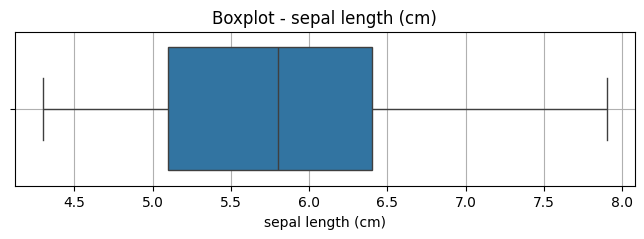


Στατιστικά για sepal length (cm)

Q1 (25%): 5.10

Q3 (75%): 6.40

IQR: 1.30

Πιθανοί outliers κάτω από: 3.15

Πιθανοί outliers πάνω από: 8.35


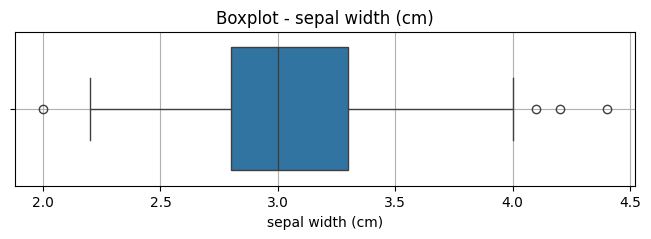


Στατιστικά για sepal width (cm)

Q1 (25%): 2.80

Q3 (75%): 3.30

IQR: 0.50

Πιθανοί outliers κάτω από: 2.05

Πιθανοί outliers πάνω από: 4.05


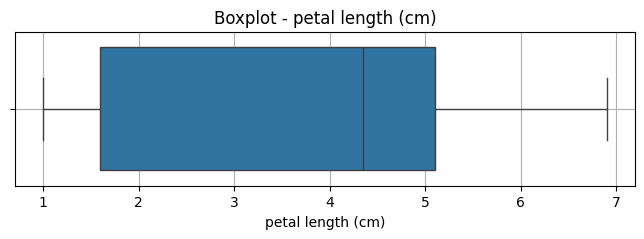


Στατιστικά για petal length (cm)

Q1 (25%): 1.60

Q3 (75%): 5.10

IQR: 3.50

Πιθανοί outliers κάτω από: -3.65

Πιθανοί outliers πάνω από: 10.35


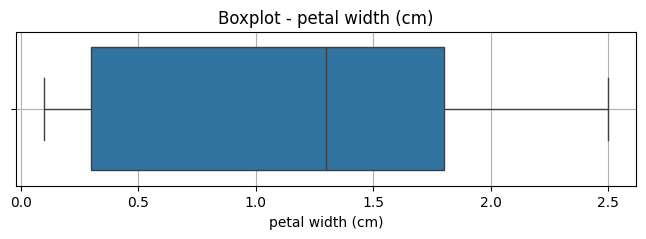


Στατιστικά για petal width (cm)

Q1 (25%): 0.30

Q3 (75%): 1.80

IQR: 1.50

Πιθανοί outliers κάτω από: -1.95

Πιθανοί outliers πάνω από: 4.05

Έλεγχος outliers στην στήλη:sepal length (cm)

Δεν βρέθηκαν outliers

Έλεγχος outliers στην στήλη:sepal width (cm)

Βρέθηκαν 4 outliers:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0

Έλεγχος outliers στην στήλη:petal length (cm)

Δεν βρέθηκαν outliers

Έλεγχος outliers στην στήλη:petal width (cm)

Δεν βρέθηκαν outliers


In [26]:
# Δημιουργία boxplots για όλα τα αριθμητικά χαρακτηριστικά
# Μας επιτρέπει να οπτικοποιήσουμε την κατανομή των τιμών και τυχόν ακραίες τιμές (outliers)
plot_all_numeric_boxplots(df)

#  Έλεγχος για outliers με βάση τον IQR κανόνα σε κάθε στήλη
# Για κάθε αριθμητικό χαρακτηριστικό εντοπίζει τιμές εκτός των ορίων [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
print_outliers_for_all_numeric(df)

###  Συμπεράσματα από τον Έλεγχο Outliers

-  **sepal width (cm)**: Εντοπίστηκαν **4 outliers** σύμφωνα με τον κανόνα IQR.
- Οι υπόλοιπες στήλες δεν περιέχουν ακραίες τιμές.

###  Πειραματική Προσέγγιση

Για να εξετάσουμε **την επίδραση των outliers** στους αλγορίθμους clustering, θα διατηρήσουμε **δύο εκδόσεις του dataset**:

- `df`: περιλαμβάνει όλα τα δείγματα (μαζί με τα outliers)
- `df_cleaned`: περιλαμβάνει μόνο τα "κανονικά" δείγματα, χωρίς outliers

Αντίστοιχα, κρατάμε και τις ετικέτες:

- `target`: για όλα τα δείγματα
- `target_cleaned`: μόνο για τα δείγματα που παραμένουν μετά τον καθαρισμό

Αυτό θα μας επιτρέψει να **συγκρίνουμε την επίδραση των outliers** στην απόδοση και την ποιότητα των clusters για κάθε αλγόριθμο.

##  Δημιουργία Καθαρής Έκδοσης του Dataset (χωρίς Outliers)

Αφού εντοπίστηκαν outliers με χρήση του κανόνα IQR, δημιουργούμε μία **καθαρή έκδοση του dataset (`df_cleaned`)** χωρίς τις ακραίες τιμές.

Αυτό θα μας επιτρέψει να συγκρίνουμε την απόδοση των clustering αλγορίθμων:

-  *Με outliers:* χρησιμοποιώντας το αρχικό `df`
-  *Χωρίς outliers:* χρησιμοποιώντας το νέο `df_cleaned`

Ο καθαρισμός πραγματοποιείται με χρήση της συνάρτησης `remove_outliers_iqr()`, η οποία ελέγχει όλες τις αριθμητικές στήλες και αφαιρεί τις αντίστοιχες γραμμές με ακραίες τιμές.

In [27]:
# Αφαίρεση outliers από όλες τις στήλες βάσει IQR κανόνα
df_cleaned = remove_outliers_iqr(df, df.columns)

# Reset του Index μετα την διαγραφή στηλών.
df_cleaned = df_cleaned.reset_index(drop=True)

# Ενημέρωση των labels ώστε να ταιριάζουν με τις γραμμές του df_cleaned
target_cleaned = target[df_cleaned.index]

Αφαιρέθηκαν 4 γραμμές με outliers.


###  Επαναφορά Index στο Καθαρισμένο Dataset

Μετά την αφαίρεση outliers, το `df_cleaned` διατήρησε τους αρχικούς δείκτες (index) του αρχικού DataFrame `df`. Αυτό σημαίνει ότι οι γραμμές του `df_cleaned` είχαν ασυνεχή αρίθμηση (π.χ. 0, 1, 2, 4, 5, ...), κάτι που μπορεί να προκαλέσει προβλήματα σε οπτικοποιήσεις ή κατά τη σύνδεση με άλλα arrays (π.χ. target).

Για το λόγο αυτό εφαρμόσαμε:

```python
df_cleaned = df_cleaned.reset_index(drop=True)

##  Βήμα 4: Ανάλυση Συσχετίσεων μεταξύ Χαρακτηριστικών

Σε αυτό το βήμα, υπολογίζουμε τη **συσχέτιση μεταξύ όλων των αριθμητικών χαρακτηριστικών** του Iris dataset, χρησιμοποιώντας τον **συντελεστή Pearson**.

Η ανάλυση συσχετίσεων μας βοηθά να:

-  Αναγνωρίσουμε ποιες μεταβλητές είναι ισχυρά συσχετισμένες μεταξύ τους
-  Επιλέξουμε κατάλληλους συνδυασμούς χαρακτηριστικών για οπτικοποίηση και clustering
-  Εντοπίσουμε πιθανή πλεοναστική πληροφορία

Η συσχέτιση κυμαίνεται από -1 έως +1:

- +1 → απόλυτα θετική συσχέτιση
- 0 → καμία γραμμική συσχέτιση
- -1 → απόλυτα αρνητική συσχέτιση

Θα χρησιμοποιηθεί heatmap για καλύτερη οπτική κατανόηση της δομής των σχέσεων μεταξύ μεταβλητών.


Πίνακας συσχετίσεων (pearson)
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0.428440         -0.366126
petal length (cm)           0.871754         -0.428440           1.000000          0.962865
petal width (cm)            0.817941         -0.366126           0.962865          1.000000


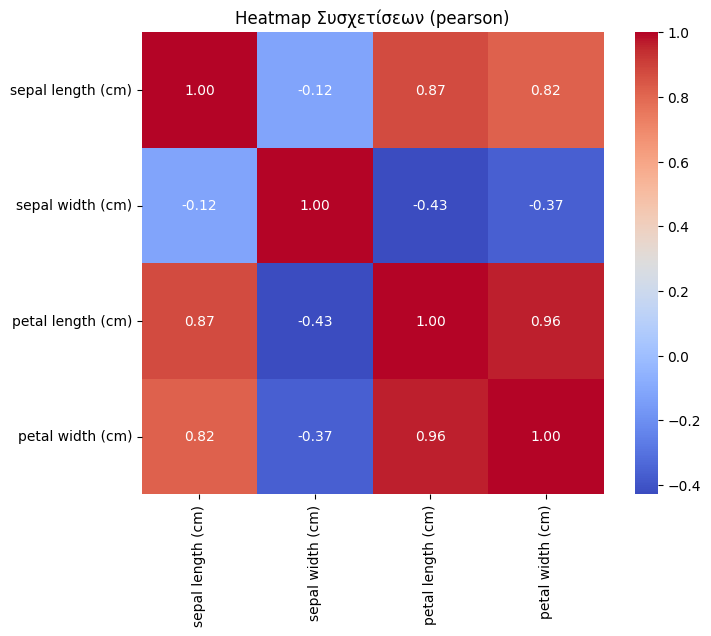

In [28]:
# Υπολογισμός και οπτικοποίηση των συσχετίσεων ανάμεσα στα χαρακτηριστικά με outliers
correlation_matrix = analyze_correlations(df)


Πίνακας συσχετίσεων (pearson)
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.123144           0.879362          0.822587
sepal width (cm)           -0.123144          1.000000          -0.406141         -0.340602
petal length (cm)           0.879362         -0.406141           1.000000          0.961866
petal width (cm)            0.822587         -0.340602           0.961866          1.000000


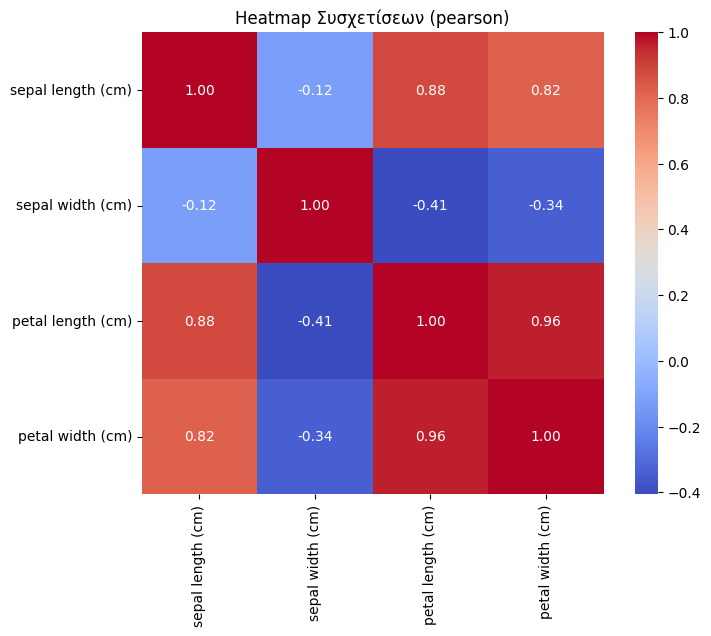

In [29]:
# Υπολογισμός και οπτικοποίηση των συσχετίσεων ανάμεσα στα χαρακτηριστικά χωρίς outliers
correlation_matrix = analyze_correlations(df_cleaned)

###  Σύγκριση Συσχετίσεων με και χωρίς Outliers

Ακολουθεί η σύγκριση των πινάκων Pearson συσχετίσεων:

| Χαρακτηριστικά             | Με Outliers | Χωρίς Outliers |
|----------------------------|-------------|----------------|
| Sepal Length ↔ Petal Length | 0.8718      | 0.8794         |
| Sepal Length ↔ Petal Width  | 0.8179      | 0.8226         |
| Petal Length ↔ Petal Width  | 0.9629      | 0.9619         |
| Sepal Width ↔ Petal Length  | -0.4284     | -0.4061        |

####  Παρατηρήσεις:

- Οι συσχετίσεις παραμένουν **σχεδόν ίδιες**, δείχνοντας ότι οι λίγοι outliers δεν επηρέασαν σημαντικά τις γραμμικές σχέσεις μεταξύ των χαρακτηριστικών.
- Η ισχυρή συσχέτιση μεταξύ `petal length` και `petal width` (> 0.96) **παραμένει σταθερή** και ενισχύει την υπόθεση ότι μεταφέρουν παρόμοια πληροφορία.
- Το `sepal width` έχει **ασθενέστερες και αρνητικές** συσχετίσεις με τα υπόλοιπα χαρακτηριστικά.

> Η απουσία σημαντικών διαφορών επιβεβαιώνει ότι τα outliers δεν παραμορφώνουν σημαντικά τη συνολική γραμμική δομή των δεδομένων — ωστόσο μπορεί να επηρεάσουν **το σχήμα των clusters** στα επόμενα βήματα.

Πριν εφαρμόσουμε clustering, πρέπει να φέρουμε τα χαρακτηριστικά στην ίδια αριθμητική κλίμακα μέσω **κανονικοποίησης (scaling)**.

###  Υποψήφιες μέθοδοι:

####  `StandardScaler`  
-  Αφαιρεί τον μέσο όρο (mean) και διαιρεί με την τυπική απόκλιση (std).
-  Τα χαρακτηριστικά αποκτούν μέση τιμή = 0 και διασπορά = 1.
-  Ιδανικό για **δεδομένα με περίπου κανονική κατανομή**.

####  `MinMaxScaler`  
-  Κλιμακώνει τα δεδομένα σε διάστημα [0, 1].
-  Διατηρεί το σχήμα της κατανομής.
-  Χρήσιμο όταν **υπάρχουν μεταβλητές που δεν είναι κανονικά κατανεμημένες** ή όταν θέλουμε να διατηρηθούν μηδενικές τιμές.

---

Για να επιλέξουμε την κατάλληλη μέθοδο, θα μελετήσουμε:

- Τη **κατανομή** των χαρακτηριστικών (`plot_distributions`)
- Την **ασυμμετρία (skewness)** και **κυρτότητα (kurtosis)** των κατανομών (`show_skew_kurtosis`)

Βασιζόμενοι σε αυτή την ανάλυση, θα αποφασίσουμε ποια μέθοδος είναι πιο κατάλληλη για τα δεδομένα μας.

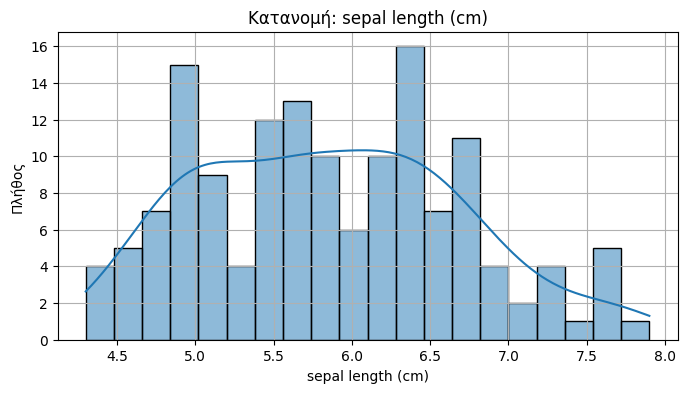

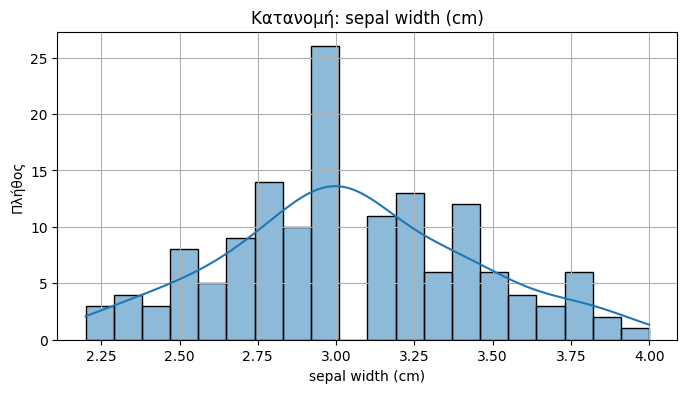

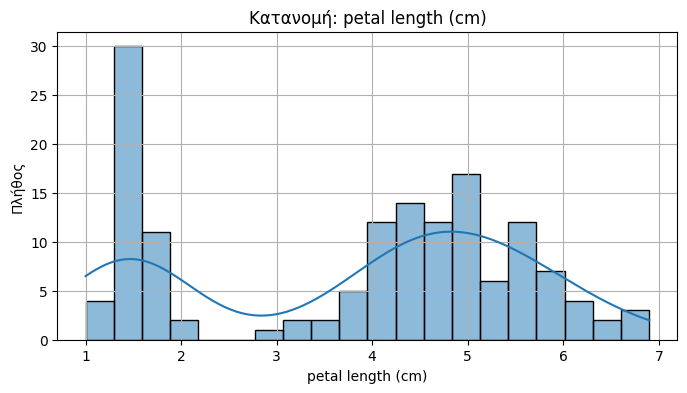

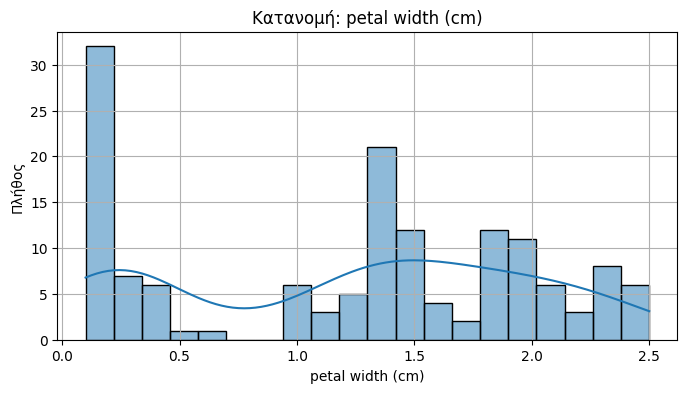


sepal length (cm)
  Skewness (ασυμμετρία): 0.28
  Kurtosis (κυρτότητα): -0.59

sepal width (cm)
  Skewness (ασυμμετρία): 0.13
  Kurtosis (κυρτότητα): -0.30

petal length (cm)
  Skewness (ασυμμετρία): -0.32
  Kurtosis (κυρτότητα): -1.36

petal width (cm)
  Skewness (ασυμμετρία): -0.15
  Kurtosis (κυρτότητα): -1.32


In [30]:
# Οπτικοποίηση κατανομής κάθε χαρακτηριστικού με histogram + KDE χωρις OUTLIERS
plot_distributions(df_cleaned)
# Υπολογισμός ασυμμετρίας και κυρτότητας
show_skew_kurtosis(df_cleaned)

#  Ανάλυση Ασυμμετρίας (Skewness) και Κυρτότητας (Kurtosis) για δεδομένα **χωρίς** outliers

Για κάθε αριθμητικό χαρακτηριστικό του καθαρισμένου dataset (`df_cleaned`) υπολογίσαμε:

###  Skewness (Ασυμμετρία)

- Η ασυμμετρία μετρά τη "κλίση" της κατανομής.
- **Skew ≈ 0** → συμμετρική κατανομή (π.χ. κανονική)
- **Skew > 0** → θετική ασυμμετρία (ουρά προς τα δεξιά)
- **Skew < 0** → αρνητική ασυμμετρία (ουρά προς τα αριστερά)

###  Kurtosis (Κυρτότητα)

- Η κυρτότητα μετρά το "ύψος" και την "ουρά" της κατανομής.
- **Kurt ≈ 0** → παρόμοια με κανονική κατανομή
- **Kurt > 0** → πιο "αιχμηρή" κατανομή (πολλές τιμές γύρω από τη μέση και μακριές ουρές)
- **Kurt < 0** → πιο "πλατιά" κατανομή (λιγότερο αιχμηρή, μικρότερη πυκνότητα στο κέντρο)

---

###  Αποτελέσματα από το `df_cleaned`:

| Χαρακτηριστικό       | Skewness | Kurtosis | Σχόλιο |
|----------------------|----------|----------|--------|
| **sepal length**     |  0.28    | -0.59    | Ελαφρώς δεξιά-κλινή, πιο επίπεδη από κανονική |
| **sepal width**      |  0.13    | -0.30    | Σχεδόν συμμετρική, ελαφρώς πλατιά |
| **petal length**     | -0.32    | -1.36    | Ελαφρώς αριστερά-κλινή, πιο "απλωμένη" |
| **petal width**      | -0.15    | -1.32    | Σχεδόν συμμετρική, επίσης πλατιά |

---

###  Συμπέρασμα:

- Όλα τα χαρακτηριστικά εμφανίζουν **χαμηλή ασυμμετρία (|skew| < 0.5)** και **αρνητική κυρτότητα**
- Οι κατανομές είναι **αρκετά συμμετρικές και χωρίς αιχμηρές κορυφές**
- Η γενική μορφή των δεδομένων είναι **κατάλληλη για κανονικοποίηση με `StandardScaler`**, καθώς η κατανομή πλησιάζει την κανονική


## Ακολουθούν τα διαγράμματα για `df` με outliers


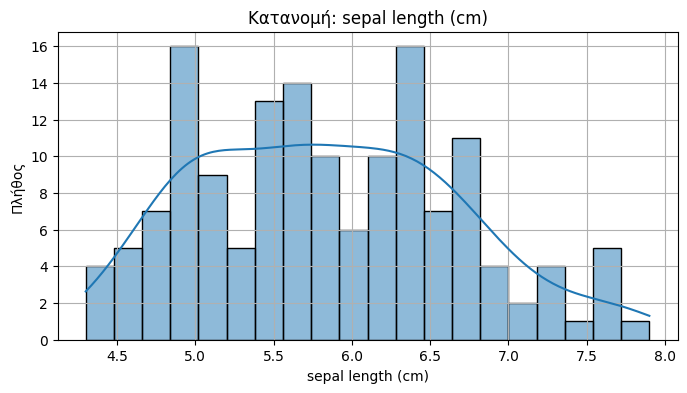

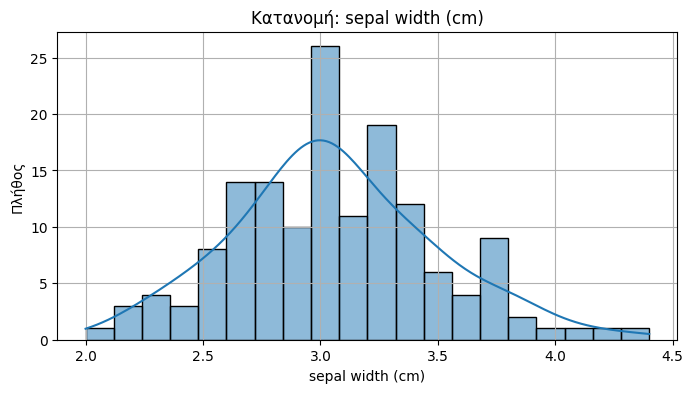

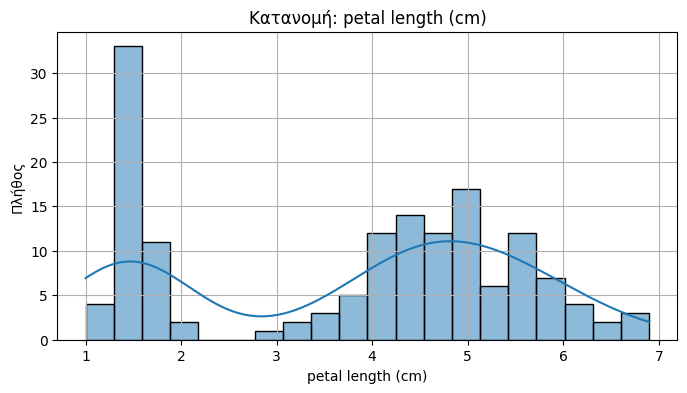

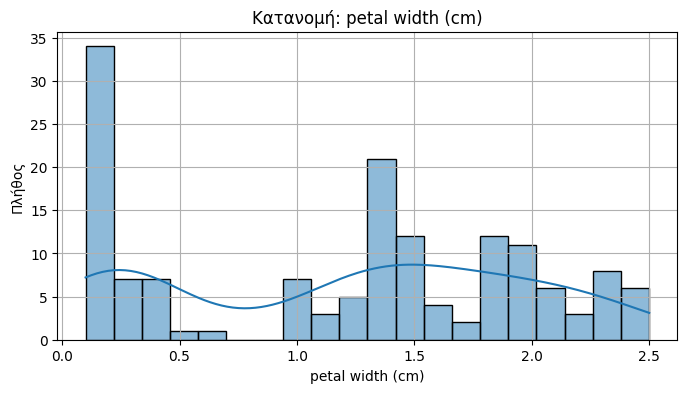


sepal length (cm)
  Skewness (ασυμμετρία): 0.31
  Kurtosis (κυρτότητα): -0.55

sepal width (cm)
  Skewness (ασυμμετρία): 0.32
  Kurtosis (κυρτότητα): 0.23

petal length (cm)
  Skewness (ασυμμετρία): -0.27
  Kurtosis (κυρτότητα): -1.40

petal width (cm)
  Skewness (ασυμμετρία): -0.10
  Kurtosis (κυρτότητα): -1.34


In [31]:
# Οπτικοποίηση κατανομής κάθε χαρακτηριστικού με histogram + KDE με OUTLIERS
plot_distributions(df)
# Υπολογισμός ασυμμετρίας και κυρτότητας
show_skew_kurtosis(df)

###  Σύγκριση Skewness και Kurtosis: Πριν και Μετά τον Καθαρισμό

Παρατηρούμε τις παρακάτω τιμές ασυμμετρίας και κυρτότητας για το αρχικό dataset (με outliers) (`df`):

| Χαρακτηριστικό       | Skewness | Kurtosis |
|----------------------|----------|----------|
| **sepal length**     |  0.31    | -0.55    |
| **sepal width**      |  0.32    |  0.23    |
| **petal length**     | -0.27    | -1.40    |
| **petal width**      | -0.10    | -1.34    |

###  Παρατήρηση:

- Οι τιμές είναι **πολύ κοντά** σε αυτές του καθαρισμένου dataset (`df_cleaned`)
- Δεν παρατηρούνται σημαντικές διαφορές που να αλλάζουν τη μορφή των κατανομών
- Επιβεβαιώνεται ότι οι **λίγοι outliers** που αφαιρέθηκαν **δεν επηρέαζαν ουσιαστικά τη γενική στατιστική συμπεριφορά** των μεταβλητών

### Συνεχίζουμε την επεξεργασία με βάση το `df_cleaned`, ως πιο σωστή εκδοχή για clustering.

### Τυποποίηση Χαρακτηριστικών με StandardScaler

Σε αυτό το βήμα εφαρμόζουμε **τυποποίηση** (standardization) στα χαρακτηριστικά του dataset, ώστε κάθε στήλη να έχει μέση τιμή **0** και τυπική απόκλιση **1**. Αυτή η μετατροπή είναι ιδιαίτερα σημαντική για αλγορίθμους που επηρεάζονται από την κλίμακα των μεταβλητών, όπως το K-Means.

 Χρησιμοποιείται η συνάρτηση `scale_features()` με επιλογή `method="standard"`, που βασίζεται στο `StandardScaler` της βιβλιοθήκης `sklearn`.

Θα δημιουργηθούν δύο σύνολα τυποποιημένων δεδομένων:
- `df_scaled`: από το αρχικό dataset (`df`)
- `df_scaled_cleaned`: από το dataset χωρίς outliers (`df_cleaned`)

Αυτό θα μας επιτρέψει να συγκρίνουμε τα αποτελέσματα clustering σε δεδομένα με και χωρίς ακραίες τιμές.

In [32]:
# Τυποποίηση χαρακτηριστικών στο αρχικό dataset (με outliers)
df_scaled = scale_features(df, method="standard")

# Τυποποίηση χαρακτηριστικών στο καθαρισμένο dataset (χωρίς outliers)
df_scaled_cleaned = scale_features(df_cleaned, method="standard")

## Εφαρμογή Αλγορίθμων Clustering

Από αυτό το σημείο και έπειτα, ξεκινά η εφαρμογή των τριών βασικών αλγορίθμων μη επιβλεπόμενης μάθησης για ομαδοποίηση (clustering):

- **KMeans**
- **Agglomerative Clustering**
- **HDBSCAN**

Κύριος στόχος είναι να μελετήσουμε πώς αυτοί οι αλγόριθμοι εντοπίζουν φυσικές ομάδες μέσα στα δεδομένα της ίριδας και να συγκρίνουμε την ποιότητα των αποτελεσμάτων τους.

### Πρώτο Dataset Εφαρμογής:
Θα ξεκινήσουμε με το **`df_scaled_cleaned`**, το οποίο:

- Περιέχει μόνο αριθμητικά χαρακτηριστικά
- Έχει **καθαριστεί από outliers**
- Έχει υποστεί **τυποποίηση με StandardScaler**

Αυτό μας εξασφαλίζει καθαρά, συγκρίσιμα και αξιόπιστα δεδομένα για clustering.

### Εύρεση του Βέλτιστου Αριθμού Clusters με KMeans

Σε αυτό το βήμα θα χρησιμοποιήσουμε τη συνάρτηση `evaluate_kmeans_range` για να αξιολογήσουμε διάφορες τιμές του αριθμού clusters **k** στο εύρος **2 έως 10**.

Η αξιολόγηση θα γίνει με βάση δύο βασικές μετρικές:

- **Elbow Method (Inertia)**

- **Silhouette Score**

 Θα βασιστούμε κυρίως στο **Silhouette Score** για την επιλογή του ιδανικού αριθμού clusters.


Βέλτιστο Silhouette Score: 0.5820 για k = 2


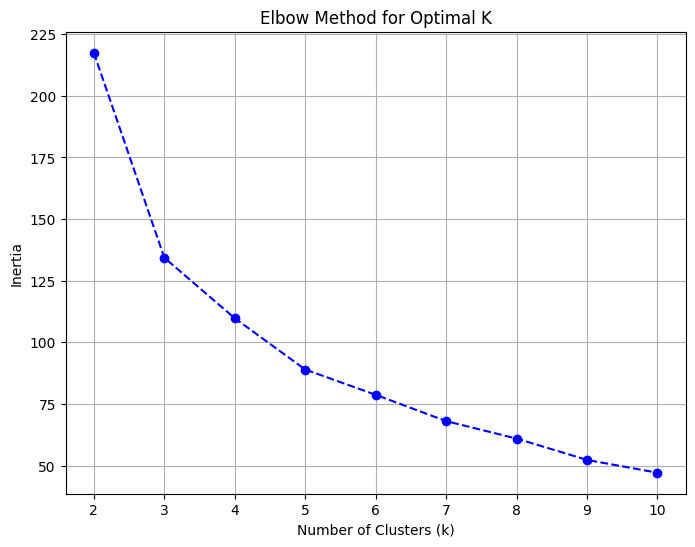

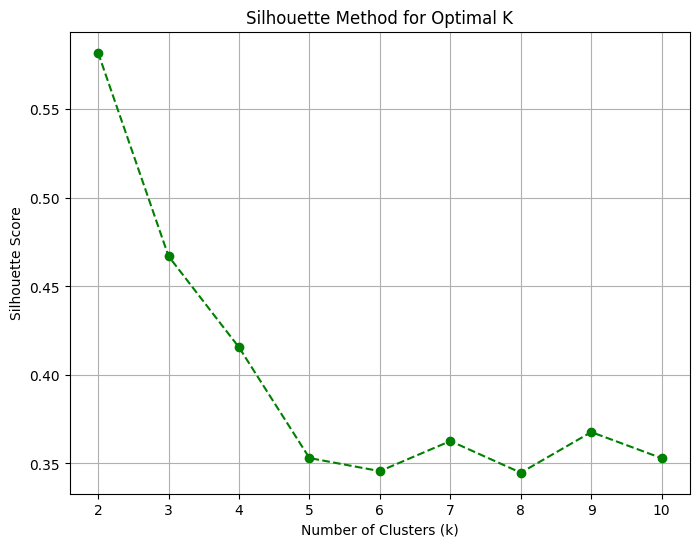

In [33]:
# Εύρεση του βέλτιστου αριθμού clusters
evaluate_kmeans_range(df_scaled_cleaned, k_range=range(2, 11))

### Επιλογή Βέλτιστου Αριθμού Clusters (k)

Αφού εφαρμόσαμε τη συνάρτηση `evaluate_kmeans_range()` στο τυποποιημένο dataset (`df_scaled_cleaned`), προέκυψαν τα εξής:

#### Elbow Method:
- Η καμπύλη inertia εμφανίζει σημαντική μείωση μεταξύ **k = 2** και **k = 4**, με σταδιακή επιπέδωση μετά.
- Το "γόνατο" της καμπύλης φαίνεται να εμφανίζεται γύρω στο **k = 3 ή 4**, υποδεικνύοντας πιθανή βέλτιστη τιμή.

#### Silhouette Score:
- Η υψηλότερη τιμή silhouette είναι **0.6869** για **k = 2**
- Από εκεί και πέρα, το σκορ μειώνεται σταθερά, δείχνοντας ότι τα clusters γίνονται λιγότερο σαφή.

#### Απόφαση:
Παρόλο που το Elbow υποδεικνύει πιθανό βέλτιστο στο **k = 3**, ο **Silhouette Score** (πιο αξιόπιστη μετρική για clustering ποιότητα) υποδεικνύει καθαρά ότι το **k = 2** είναι το πιο διακριτό και σταθερό σενάριο.

 Επομένως, επιλέγουμε: **k = 2**

In [34]:
# Εκτέλεση KMeans με k = 2
kmeansmodel = run_kmeans(df_scaled_cleaned, n_clusters=2)

Inertia:
 217.4993024803732
Silhouette Score: 0.5820


### Οπτικοποίηση Clusters για Όλα τα Ζεύγη Χαρακτηριστικών (2D)

Για να κατανοήσουμε πώς σχηματίζονται τα clusters στο επίπεδο των χαρακτηριστικών, θα δημιουργήσουμε 2D διαγράμματα διασποράς (scatter plots) για όλα τα δυνατά ζεύγη μεταβλητών.

Σε κάθε γράφημα:
- Τα σημεία απεικονίζονται με βάση δύο χαρακτηριστικά.
- Το χρώμα αντιστοιχεί στο cluster που προέβλεψε ο αλγόριθμος KMeans.
- Αν υπάρχουν centroids (κέντρα των clusters), θα απεικονίζονται με κόκκινα "Χ".

Αυτό βοηθά στο να εντοπίσουμε ποιοι συνδυασμοί χαρακτηριστικών προσφέρουν καλύτερο διαχωρισμό μεταξύ των clusters.

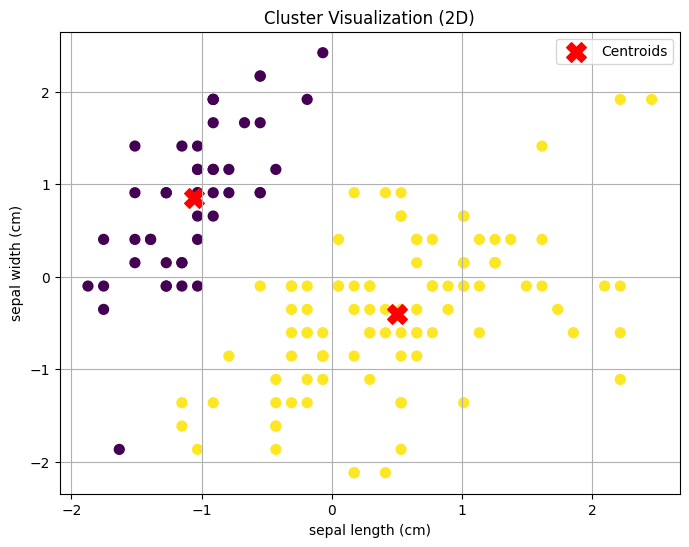

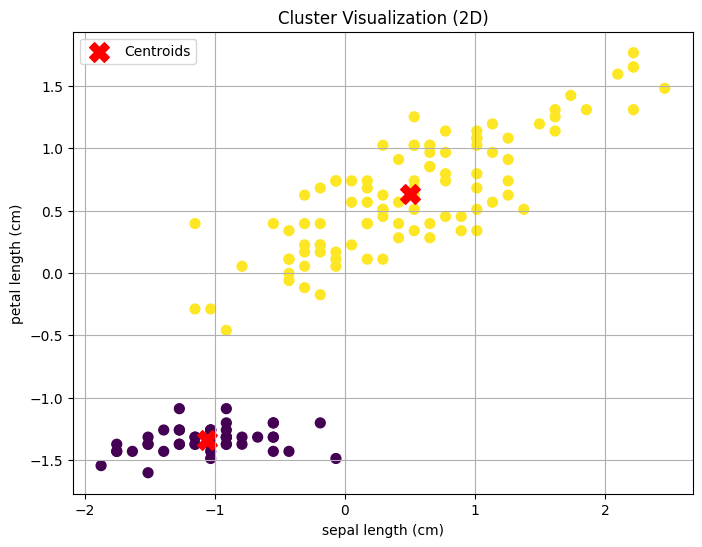

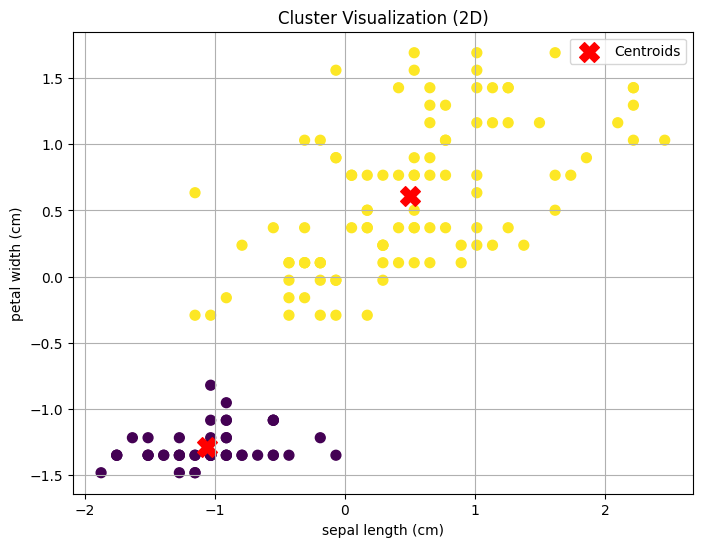

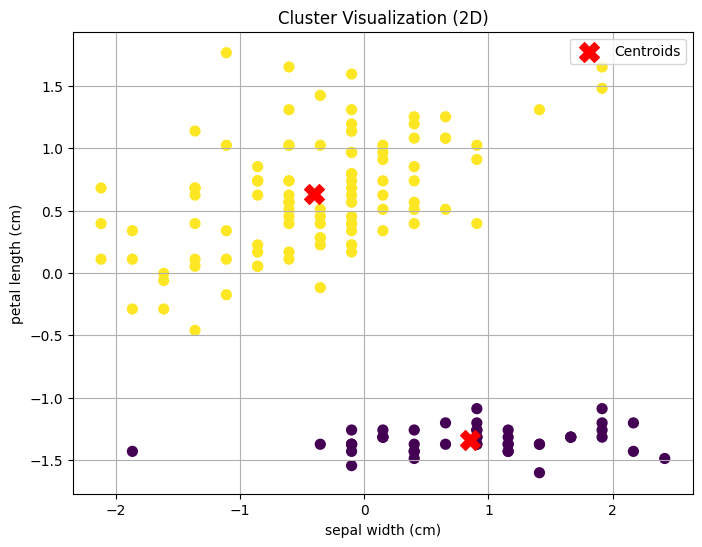

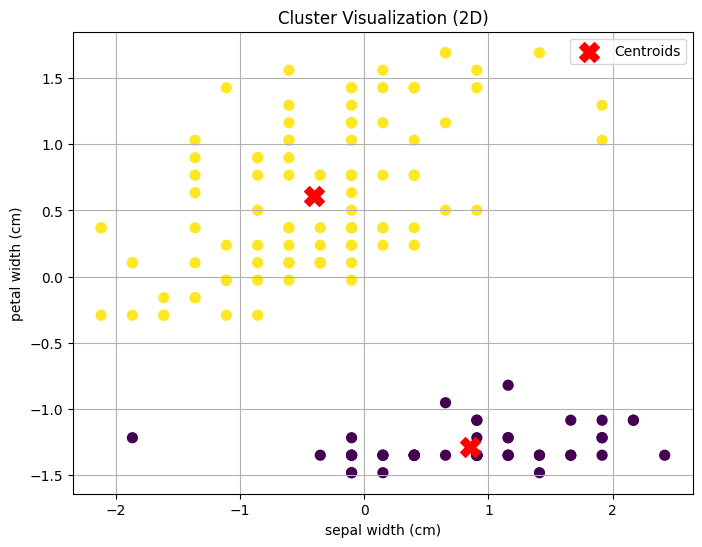

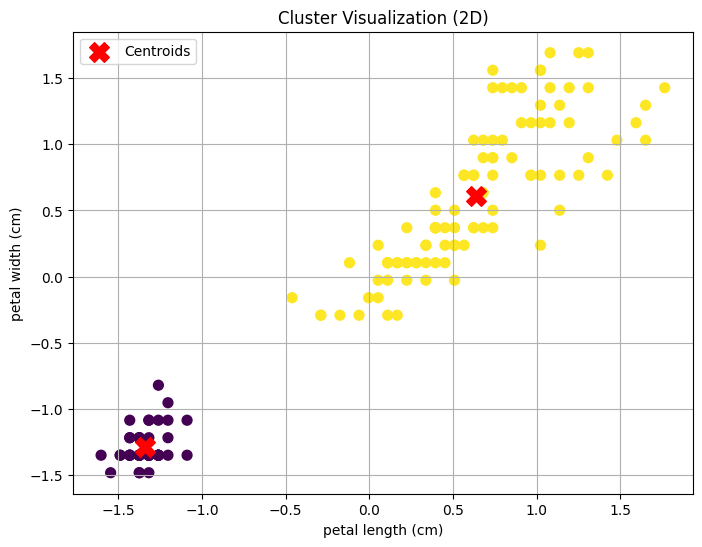

In [35]:
# Οπτικοποίηση όλων των συνδυασμών χαρακτηριστικών σε 2D

# Λίστα με τα ζεύγη χαρακτηριστικών για προβολή
feature_pairs = [
    ["sepal length (cm)", "sepal width (cm)"],
    ["sepal length (cm)", "petal length (cm)"],
    ["sepal length (cm)", "petal width (cm)"],
    ["sepal width (cm)", "petal length (cm)"],
    ["sepal width (cm)", "petal width (cm)"],
    ["petal length (cm)", "petal width (cm)"]
]
for pair in feature_pairs:
    visualize_clusters(kmeansmodel, df_scaled_cleaned, pair, mode="2D")

### Εύρεση του Βέλτιστου Αριθμού Clusters με Ιεραρχικό Clustering (Agglomerative)

Σε αυτό το βήμα θα εφαρμόσουμε **ιεραρχικό clustering (Agglomerative Clustering)**, μια bottom-up τεχνική όπου κάθε σημείο ξεκινά ως ξεχωριστό cluster και σταδιακά συγχωνεύονται με βάση την ομοιότητά τους.

Για να επιλέξουμε τον ιδανικό αριθμό clusters:

- Χρησιμοποιούμε τη συνάρτηση `evaluate_agglomerative_range(...)` για να υπολογίσουμε τον **Silhouette Score** για κάθε πιθανό αριθμό clusters από **2 έως 10**, με **Ward linkage** και **ευκλείδια απόσταση**.
- Παράλληλα, απεικονίζουμε ένα **δενδρόγραμμα (dendrogram)** με τη `plot_dendrogram_only(...)`, το οποίο δείχνει τον τρόπο με τον οποίο συγχωνεύονται τα clusters.

 Το dendrogram μας βοηθά να εντοπίσουμε "άλματα" στη συγχώνευση που υποδεικνύουν φυσικούς διαχωρισμούς στα δεδομένα.

 Θα βασιστούμε τόσο στο **Silhouette Score** όσο και στην **οπτική ανάλυση του dendrogram** για να επιλέξουμε τον κατάλληλο αριθμό clusters.


Βέλτιστο Silhouette Score: 0.5820 για k = 2


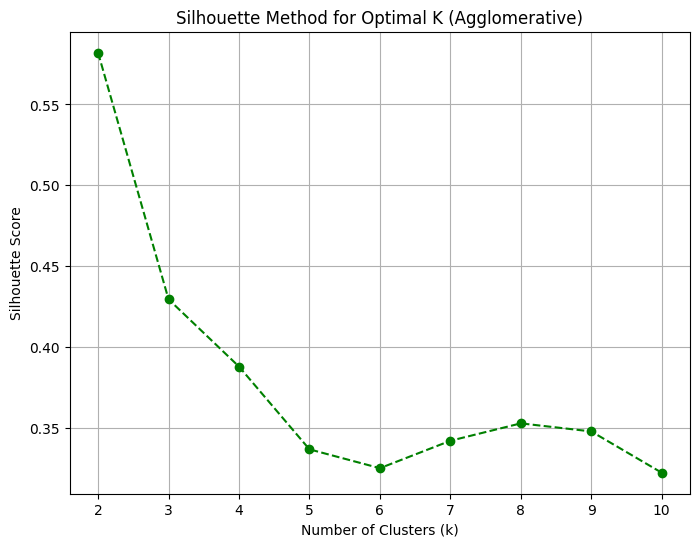

In [36]:
# Υπολογισμός Silhouette Score για διαφορετικά k (2 έως 10)
evaluate_agglomerative_range(
    df_scaled_cleaned,
    k_range=range(2, 11),
    linkage='ward',
    metric='euclidean',
    show_scores=True
)

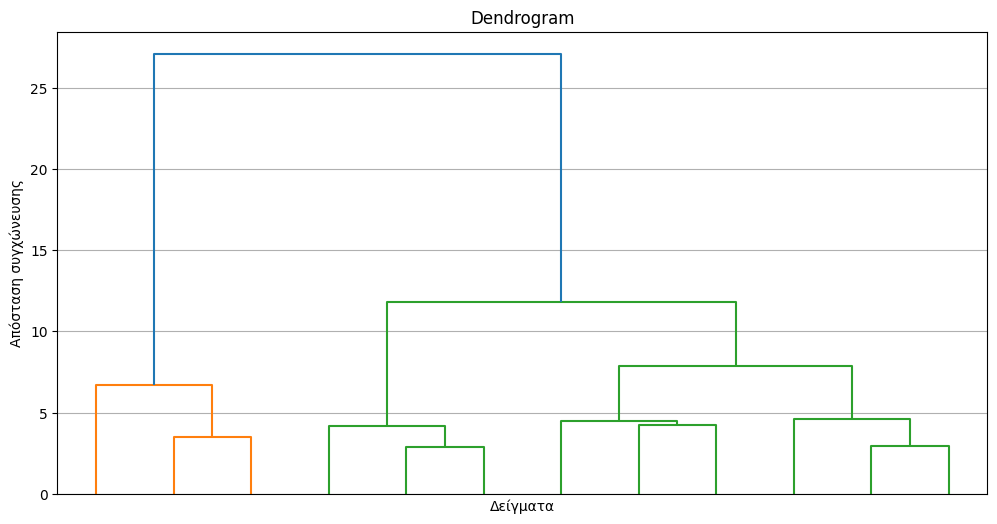

In [37]:
# Δενδρόγραμμα για οπτική κατανόηση της ιεραρχικής συγχώνευσης
plot_dendrogram_only(
    df_scaled_cleaned,
    linkage_method='ward',
    metric='euclidean',
    figsize=(12, 6),
    title="Dendrogram",
    truncate_lastp=12
)

### Ανάλυση Dendrogram & Silhouette για Agglomerative Clustering

Από την εφαρμογή της συνάρτησης `evaluate_agglomerative_range()` προέκυψε:

- **Silhouette Score** μέγιστο για **k = 2** → Καλή συνοχή εντός των ομάδων, αλλά περιορισμένη διαχωρισιμότητα.
- Το **dendrogram**, ωστόσο, υποδεικνύει ότι τα δεδομένα αρχικά διαχωρίζονται σε **3 υποσύνολα**, τα οποία συγχωνεύονται σε δύο περίπου στο επίπεδο **συγχώνευσης ≈ 12**.

Η συγχώνευση αυτή σε υψηλότερη απόσταση δείχνει πως τα **δύο clusters που ενώνονται σε εκείνο το ύψος** είναι πιο απομακρυσμένα και ενδέχεται να είναι φυσικά διακριτά.

### Απόφαση:
Έχουμε δύο εναλλακτικές προσεγγίσεις για να εξερευνήσουμε αυτή την υποψία:

1. **Χρήση `n_clusters=3`** στον αλγόριθμο Agglomerative Clustering, ώστε να ελέγξουμε αν προκύπτουν πιο νόηματικές ομάδες.
2. **Εφαρμογή `distance_threshold ≈ 10–12`** χωρίς `n_clusters`, για να διακόψουμε τη συγχώνευση αυτόματα όταν φτάσουμε σε εκείνο το επίπεδο απόστασης.

 Θα εφαρμόσουμε και τις δύο μεθόδους για να συγκρίνουμε την επίδοσή τους και τη δομή των παραγόμενων clusters.

### Εκτέλεση Agglomerative Clustering με Ενιαία Συνάρτηση

Σε αυτό το βήμα χρησιμοποιούμε τη συνάρτηση `run_agglomerative_clustering()`, η οποία ενσωματώνει:

- Την εκπαίδευση μοντέλου Agglomerative Clustering με παραμετροποίηση:
  - `n_clusters` ή `distance_threshold`
  - `linkage` και `metric`
- Τον (προαιρετικό) υπολογισμό **Silhouette Score** για αξιολόγηση ποιότητας.
- Την (προαιρετική) εμφάνιση **dendrogram**.

### Τρεις Διαδοχικές Εκτελέσεις

Θα εφαρμόσουμε τον αλγόριθμο σε τρία διαφορετικά σενάρια:

1. **Με `n_clusters = 2`**  
   Για να συγκρίνουμε με το προηγούμενο αποτέλεσμα της συνάρτησης `evaluate_agglomerative_range()` που πρότεινε k = 2 βάσει silhouette score.

2. **Με `n_clusters = 3`**  
   Για να αξιολογήσουμε την εναλλακτική που προτείνει το dendrogram, όπου παρατηρήθηκε συγχώνευση 3 ομάδων σε 2 γύρω στο επίπεδο απόστασης 12.

3. **Με `distance_threshold = 10`**  
   Για να αφήσουμε τον αλγόριθμο να καθορίσει αυτόματα τον αριθμό clusters, κόβοντας το dendrogram περίπου στο σημείο όπου έγινε η βασική συγχώνευση.

 Αυτά τα τρία σενάρια θα μας δώσουν πλήρη εικόνα της δομής του dataset και θα μας επιτρέψουν να επιλέξουμε το πιο νόηματικό clustering.

In [38]:
agg_model_k2 = run_agglomerative_clustering(df_scaled_cleaned, n_clusters=2)
agg_model_k3 = run_agglomerative_clustering(df_scaled_cleaned, n_clusters=3)
agg_model_d10 = run_agglomerative_clustering(df_scaled_cleaned, distance_threshold=10, n_clusters=None)


Silhouette Score: 0.5820

Silhouette Score: 0.4294

Silhouette Score: 0.4294


###  Οπτικοποίηση των Αποτελεσμάτων του Agglomerative Clustering

Αφού εφαρμόσαμε τον αλγόριθμο Agglomerative Clustering σε τρία σενάρια (`k=2`, `k=3`, `distance_threshold=10`), ήρθε η ώρα να **οπτικοποιήσουμε τα αποτελέσματα**.

Για κάθε περίπτωση:
- Χρησιμοποιούμε τη συνάρτηση `visualize_clusters()` σε 2D mode.
- Οπτικοποιούμε όλους τους δυνατούς συνδυασμούς 2 χαρακτηριστικών (6 συνολικά διαγράμματα ανά μοντέλο).

 Αυτό μας επιτρέπει να παρατηρήσουμε:
- Τη μορφή των παραγόμενων clusters
- Αν είναι διαχωρίσιμα σε διαφορετικές διαστάσεις
- Αν υπάρχει επικάλυψη ανάμεσα σε κατηγορίες

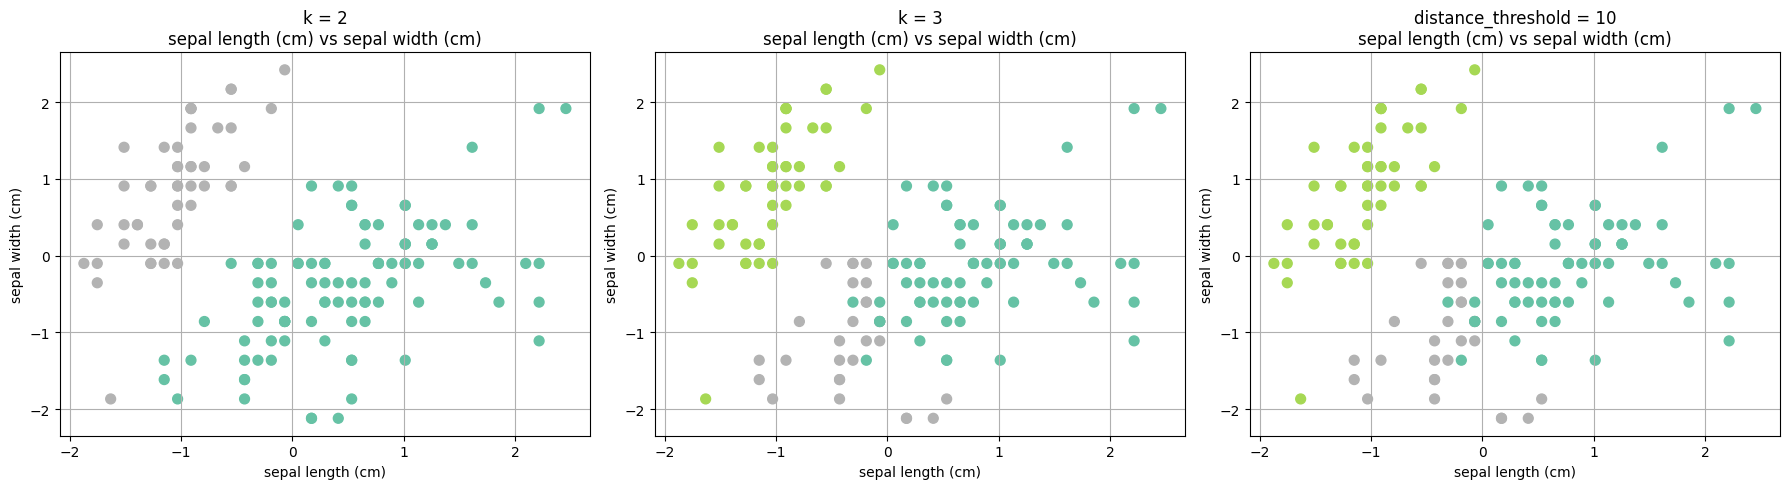

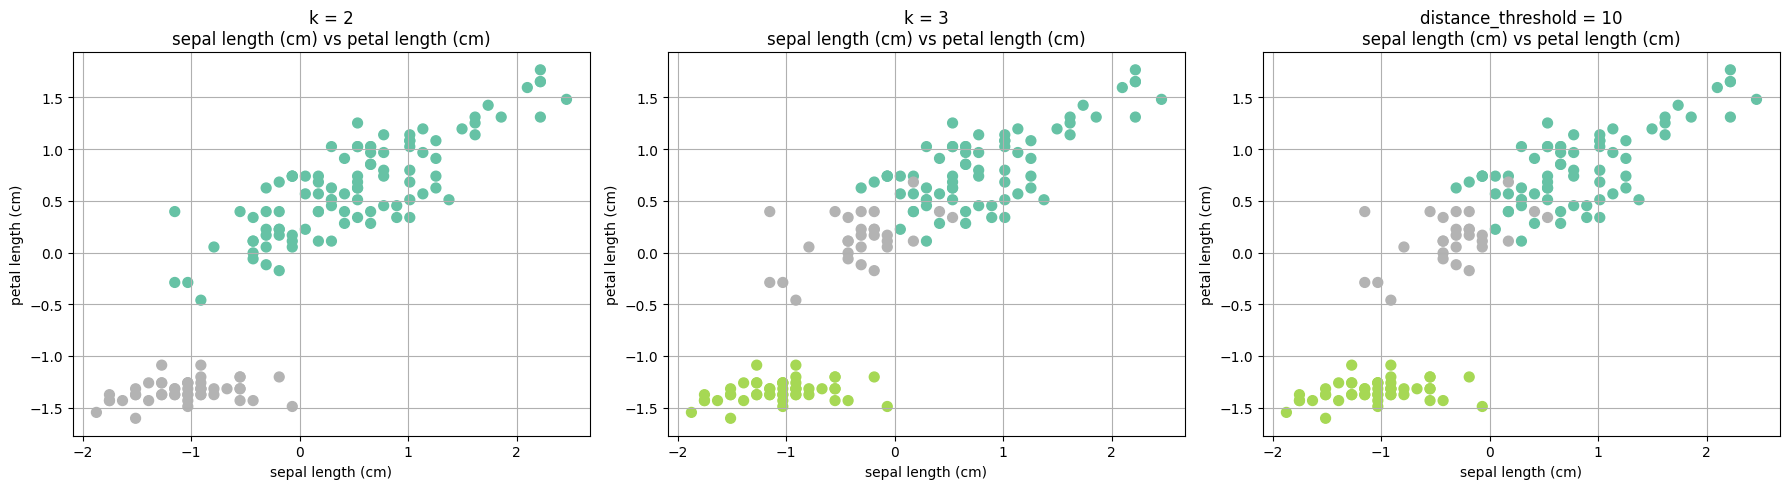

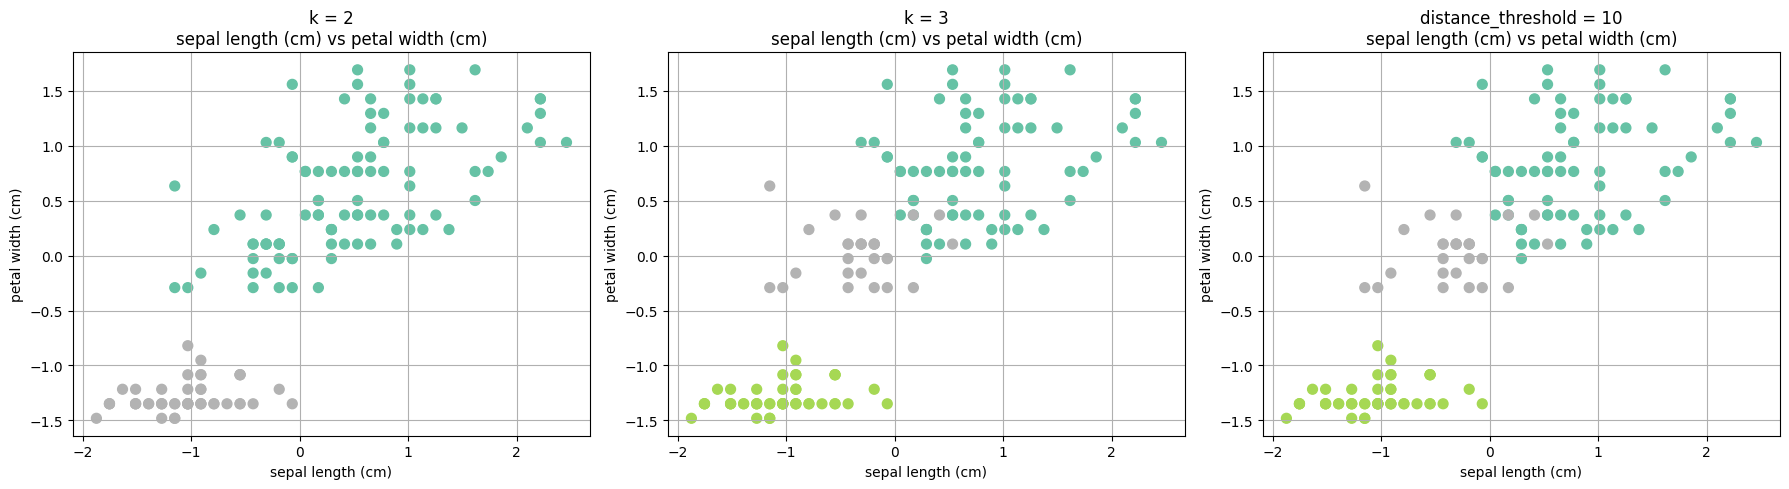

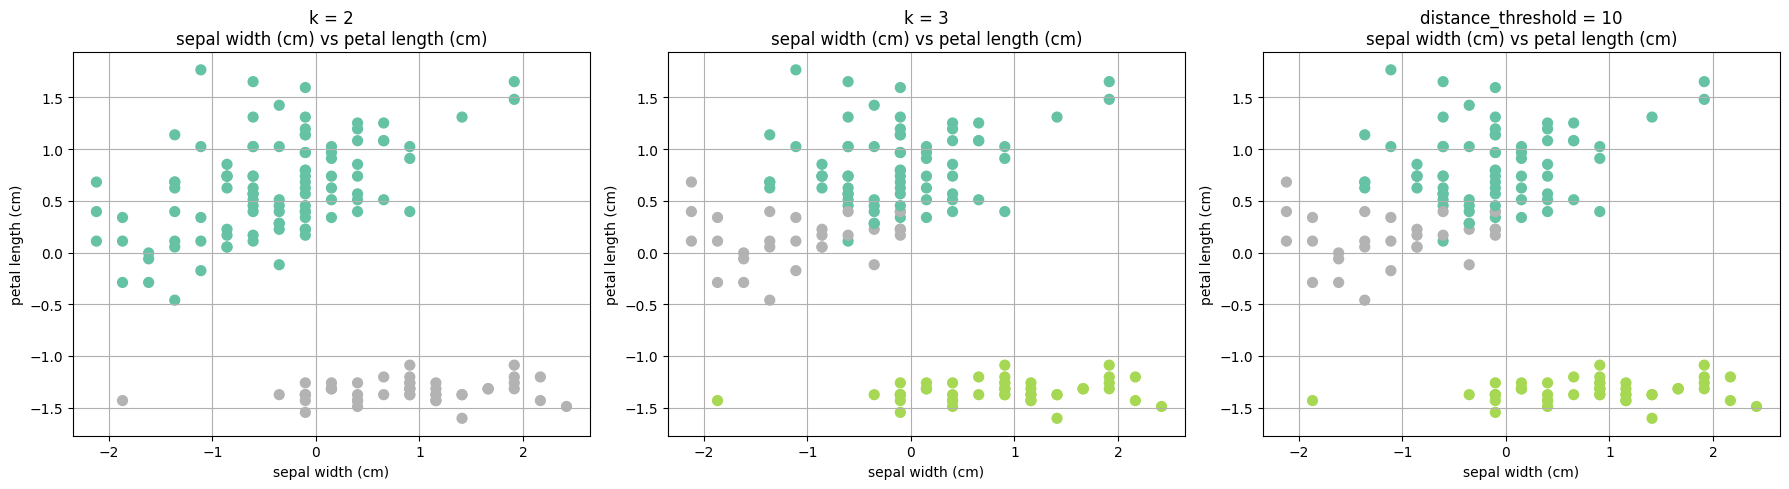

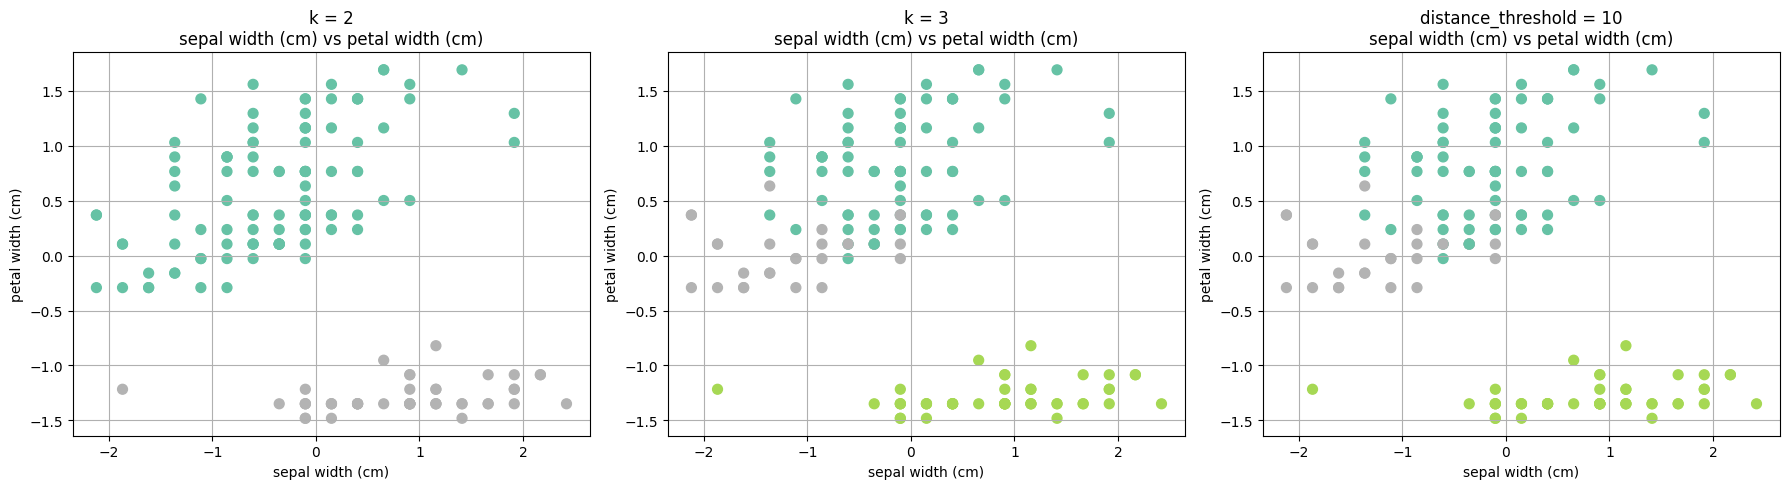

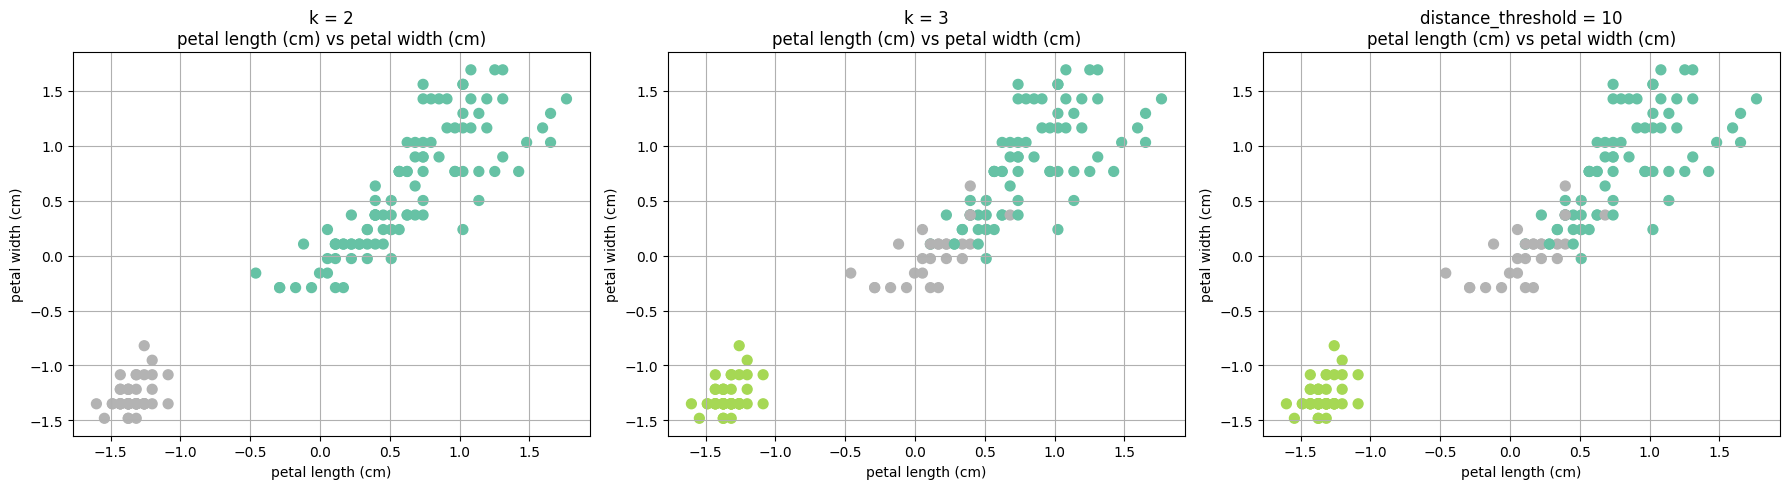

In [39]:
# Λίστα με τα μοντέλα και τις περιγραφές τους
agg_models = [agg_model_k2, agg_model_k3, agg_model_d10]
titles = ["k = 2", "k = 3", "distance_threshold = 10"]

# Δημιουργία εικόνων για κάθε ζεύγος χαρακτηριστικών
plot_cluster_results(df_scaled_cleaned, agg_models, titles, feature_pairs)

### Σύγκριση των Τριών Εκδοχών Agglomerative Clustering (2D Visualization)

Η παραπάνω οπτικοποίηση δείχνει τα αποτελέσματα clustering για το ίδια ζεύγη χαρακτηριστικών, συγκρίνοντας:

- **k = 2**
- **k = 3**
- **distance_threshold = 10**

#### Παρατηρήσεις:

- **k = 2**:  
  Ο διαχωρισμός είναι πολύ καθαρός, με δύο καλά διαχωρίσιμα clusters.

- **k = 3** και **d_th = 10**:  
  Το μοντέλο εντοπίζει **τρία clusters**, εκ των οποίων το ένα είναι **πλήρως διαχωρίσιμο** από τα υπόλοιπα. Τα άλλα δύο προκύπτουν από **διάσπαση ενός   ενιαίου cluster** και βρίσκονται **πολύ κοντά μεταξύ τους**, με εμφανή **επικάλυψη**.  
  Το μοντέλο προσπαθεί να αναδείξει λεπτομέρειες εντός του μεγάλου cluster, αλλά ο διαχωρισμός δεν είναι σαφής.

#### Συμπέρασμα:

Η λύση με **k = 2 φαίνεται η πιο σταθερή και καθαρή**, τουλάχιστον για αυτόν τον συνδυασμό χαρακτηριστικών. Οι άλλες δύο επιλογές (k = 3, d_th = 10) προσπαθούν να αναλύσουν περαιτέρω το μεγάλο cluster, χωρίς όμως μεγάλη διαχωρισιμότητα

### Εφαρμογή HDBSCAN Clustering

Τώρα εφαρμόζουμε τον αλγόριθμο **HDBSCAN** (Hierarchical Density-Based Spatial Clustering of Applications with Noise), ο οποίος:

- **Δεν απαιτεί** τον καθορισμό αριθμού clusters εκ των προτέρων.
- Μπορεί να **ανιχνεύσει θόρυβο** και σημεία που δεν ανήκουν σε κανένα cluster.
- Χρησιμοποιεί **ιεραρχική ανάλυση πυκνότητας** για να εντοπίσει τις πιο "σταθερές" ομάδες στο χώρο χαρακτηριστικών.

#### Παράμετροι που χρησιμοποιούμε:

- `min_cluster_size = 5`: Ελάχιστο πλήθος σημείων για να θεωρηθεί έγκυρο cluster.
- `metric = 'euclidean'`: Απόσταση που χρησιμοποιείται για τη μέτρηση γειτνίασης.
- `cluster_selection_method = 'eom'`: Επιλέγει clusters με βάση τη σταθερότητα στη δενδρική δομή.

 Στόχος είναι να διαπιστώσουμε αν το HDBSCAN μπορεί να ανιχνεύσει πιο φυσικές ομάδες ή να εντοπίσει θορυβώδεις παρατηρήσεις που άλλοι αλγόριθμοι αγνοούν.

In [40]:
hdbscan_model = run_hdbscan_clustering(df_scaled_cleaned)


Αριθμός clusters: 2
Αριθμός outliers: 2


### Οπτικοποίηση Αποτελεσμάτων HDBSCAN

Μετά την εκτέλεση του αλγορίθμου HDBSCAN παρατηρήθηκε:

-  **Αριθμός clusters**: 2
-  **Αριθμός outliers**: 2 (σημεία που δεν ταξινομήθηκαν σε κανένα cluster)

Η παρουσία outliers είναι βασικό πλεονέκτημα του HDBSCAN, καθώς εντοπίζει περιοχές χαμηλής πυκνότητας και τις εξαιρεί από τα κανονικά clusters.

Στη συνέχεια, απεικονίζουμε τα αποτελέσματα σε 2D scatter plots για κάθε συνδυασμό χαρακτηριστικών, με χρωματισμό ανάλογα με τα clusters που εντόπισε ο αλγόριθμος.

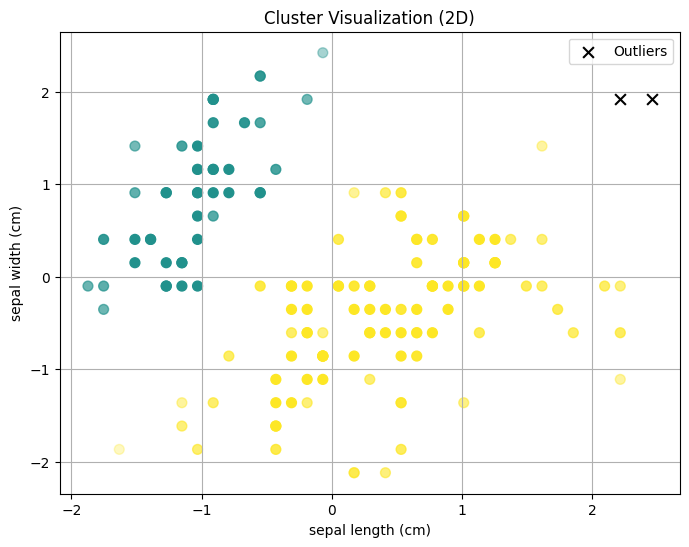

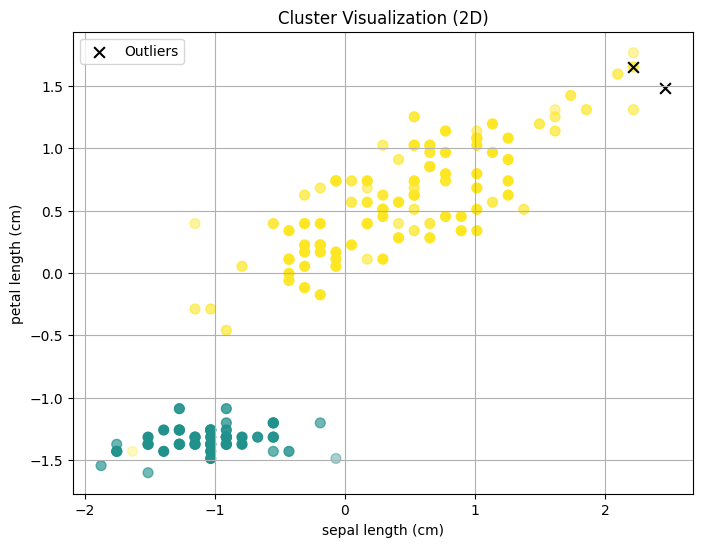

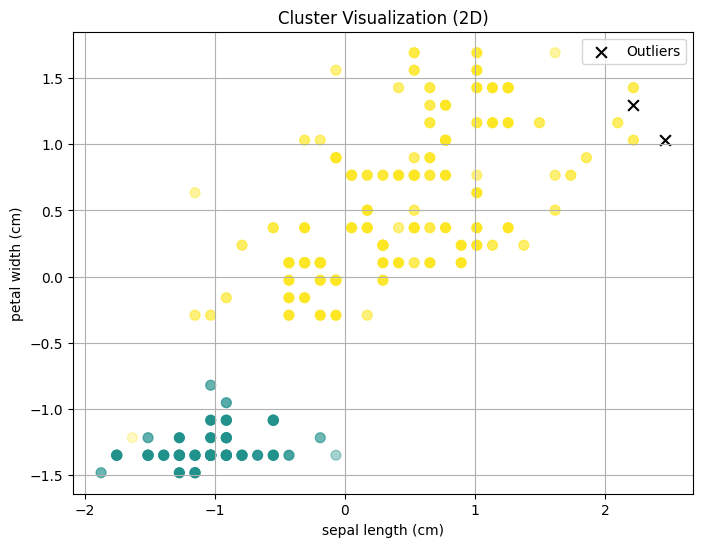

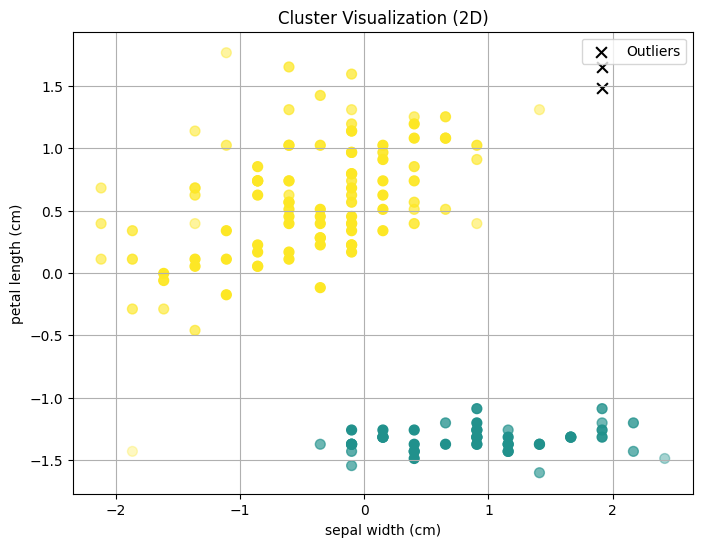

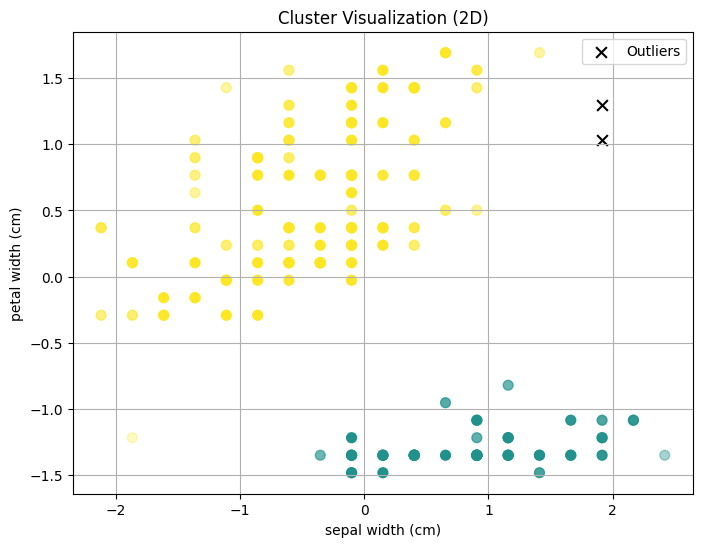

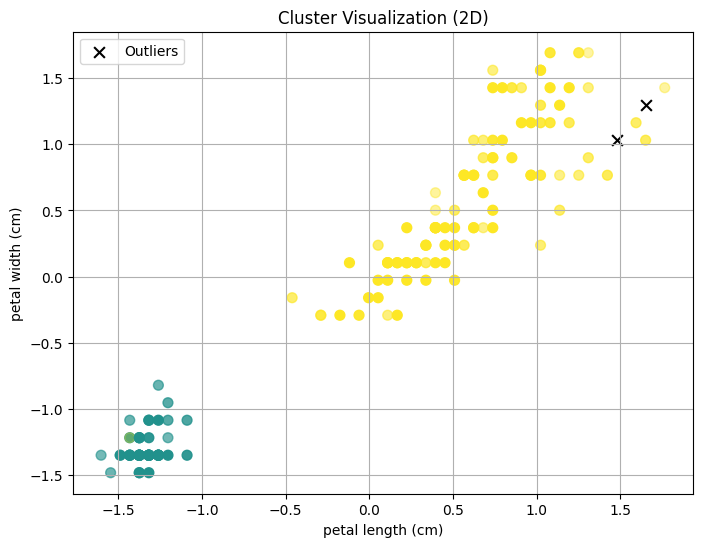

In [41]:
# 2D Οπτικοποίηση των αποτελεσμάτων του HDBSCAN
for pair in feature_pairs:
    visualize_clusters(hdbscan_model, df_scaled_cleaned, pair, mode="2D")

### Παρατηρήσεις για τα αποτελέσματα του HDBSCAN

Ο αλγόριθμος **HDBSCAN** εντόπισε επίσης **2 clusters**, με μερικά σημεία να επισημαίνονται ως **outliers** (χωρίς ανάθεση σε κάποιο cluster).

- Τα σημεία με **διαφάνεια** (χαμηλό opacity) στο γράφημα έχουν **χαμηλότερη πιθανότητα συμμετοχής** στο cluster στο οποίο τοποθετούνται.
- Παρατηρούμε ότι ακόμα και στο **μεσαίο τμήμα του μεγάλου cluster**, υπάρχουν τέτοια "αβέβαια" σημεία, γεγονός που υποδηλώνει ότι η συνοχή του cluster δεν είναι απόλυτη.
- Παρόμοιο φαινόμενο εμφανίστηκε και στον **Agglomerative με k = 3**, όπου παρατηρήθηκε **διάσπαση ενός ενιαίου cluster σε δύο**, αλλά με **επικάλυψη** και **χωρίς καθαρό διαχωρισμό**.

 Συνεπώς, αν και οι αλγόριθμοι συμφωνούν σε γενικές γραμμές για την ύπαρξη δύο βασικών ομάδων, διατηρούν επιφυλάξεις (χαμηλές πιθανότητες ή επικάλυψη) ως προς τη σαφή οριοθέτηση των clusters.

### Οπτική Σύγκριση των Αλγορίθμων Clustering

Σε αυτό το βήμα συγκρίνουμε οπτικά τα αποτελέσματα τριών διαφορετικών αλγορίθμων clustering για κάθε ζεύγος χαρακτηριστικών:

- **KMeans** με `k = 2`
- **Agglomerative Clustering** με `k = 2`
- **HDBSCAN**

Η απεικόνιση γίνεται σε 2D scatter plots για τα εξής ζεύγη χαρακτηριστικών:

- sepal length (cm) vs sepal width (cm)
- sepal length (cm) vs petal length (cm)
- sepal length (cm) vs petal width (cm)
- sepal width (cm) vs petal length (cm)
- sepal width (cm) vs petal width (cm)
- petal length (cm) vs petal width (cm)

 Κάθε σειρά διαγραμμάτων παρουσιάζει το ίδιο ζεύγος χαρακτηριστικών για όλους τους αλγορίθμους, διευκολύνοντας τη σύγκριση των σχηματισμένων clusters.  
 Αν υπάρχουν σημεία με χαμηλή διαφάνεια (transparency), υποδηλώνουν χαμηλή πιθανότητα ένταξης (π.χ. από HDBSCAN).

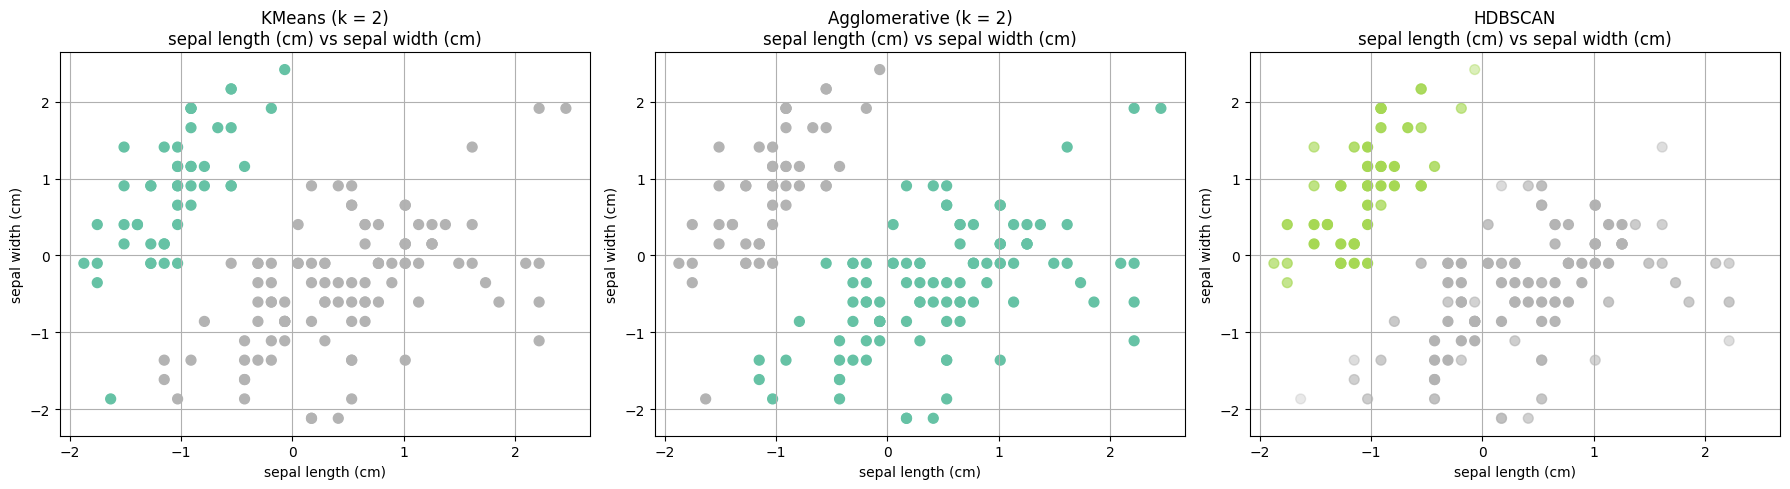

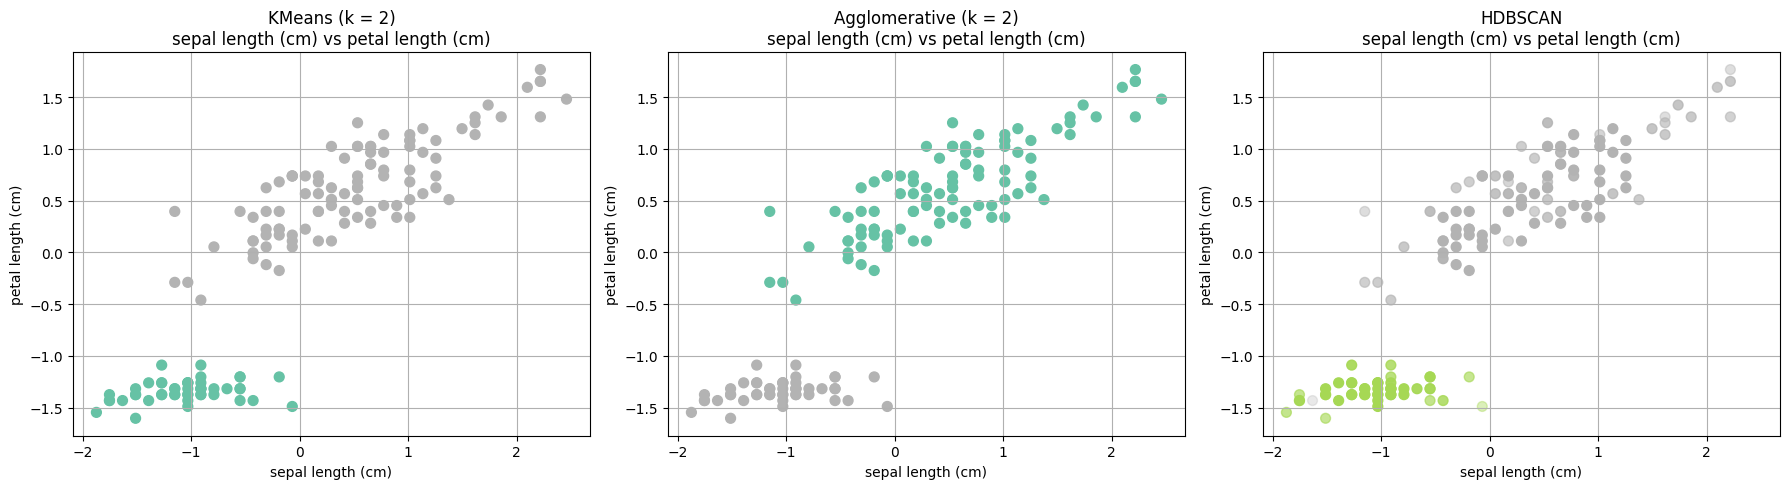

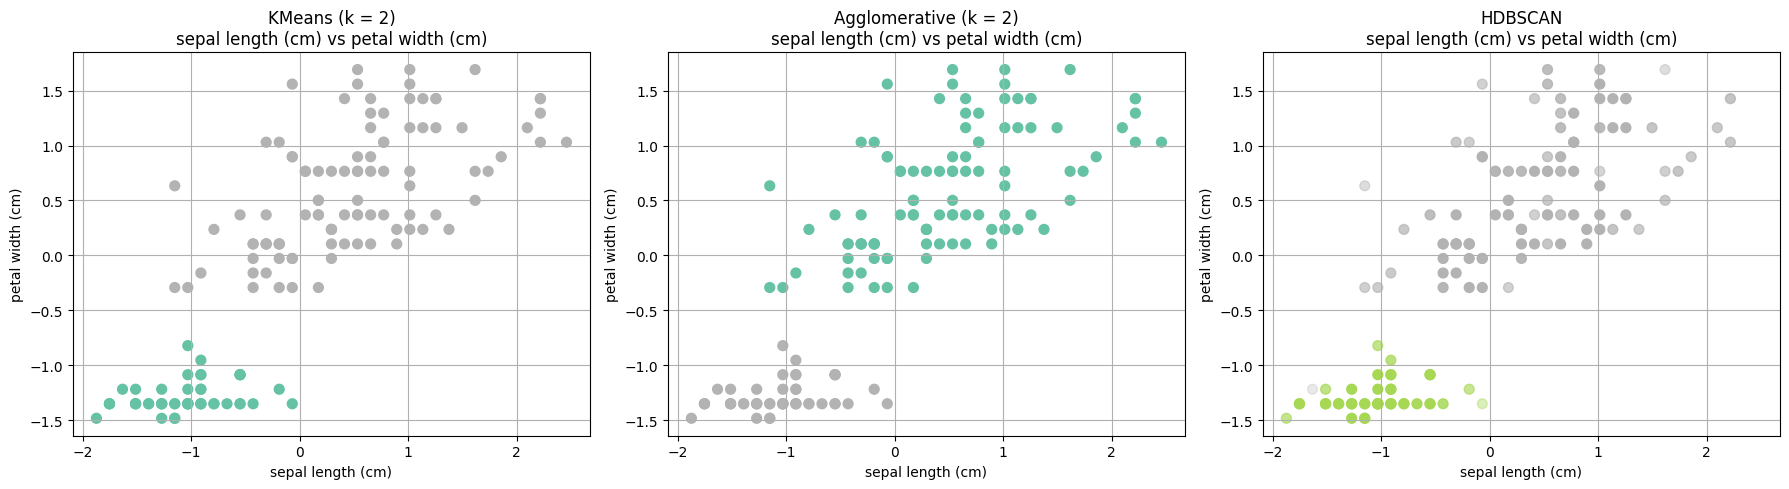

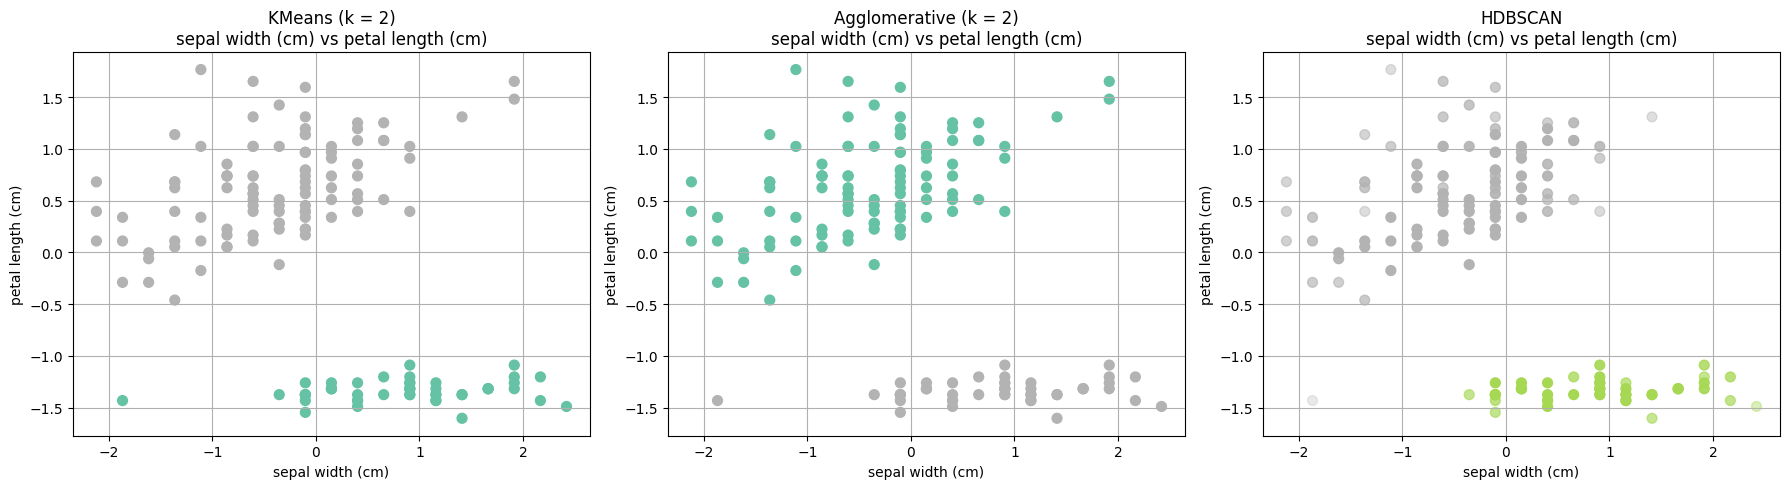

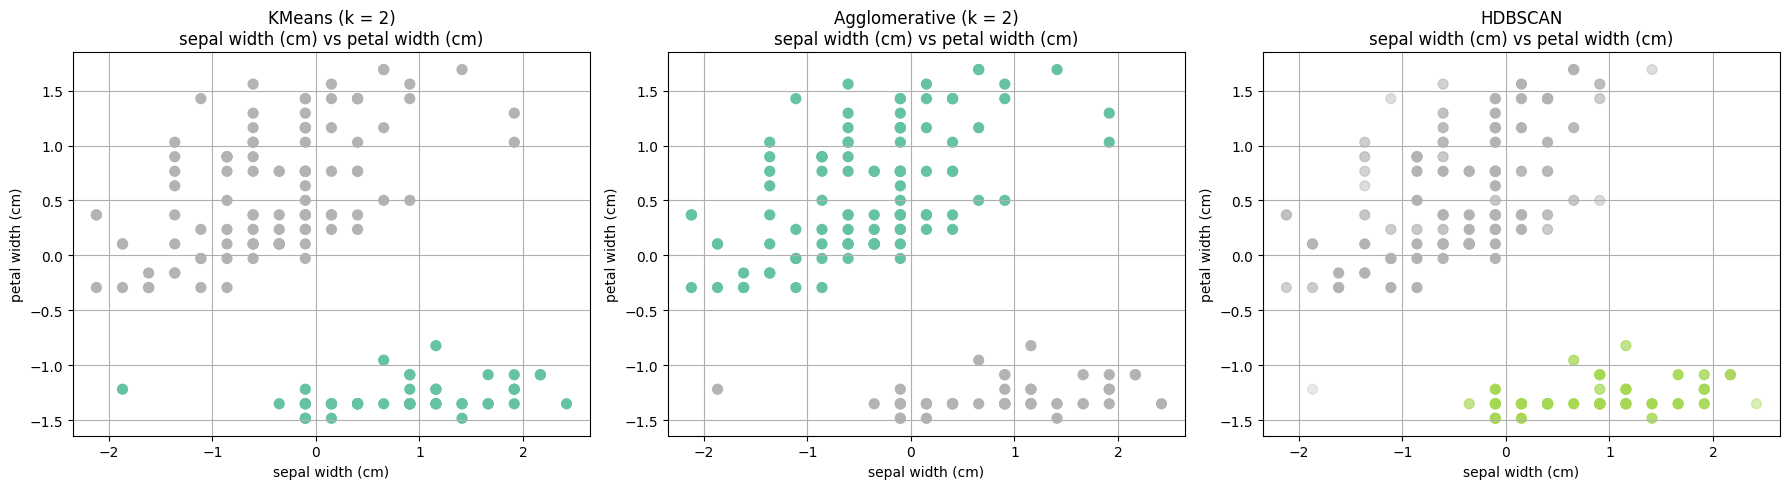

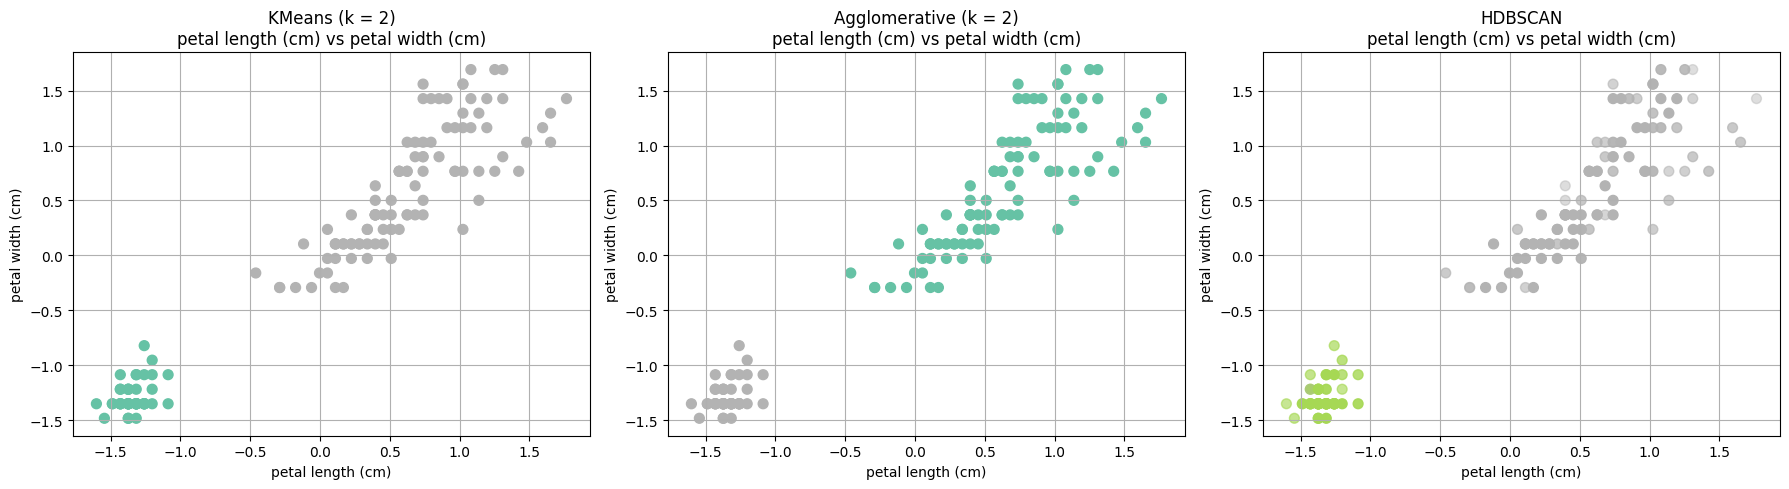

In [42]:
models = [kmeansmodel, agg_model_k2, hdbscan_model]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN"]
plot_cluster_results(df_scaled_cleaned, models, titles, feature_pairs)

### Παρατήρηση

Οι οπτικές διαφορές μεταξύ των τριών αλγορίθμων (**KMeans**, **Agglomerative**, **HDBSCAN**) είναι **αμελητέες** στα περισσότερα ζεύγη χαρακτηριστικών.  
Όλοι καταλήγουν σε **παρόμοιο διαχωρισμό των δεδομένων**, εντοπίζοντας τις ίδιες δύο βασικές ομάδες στο dataset.

### Αξιολόγηση Ποιότητας των Clustering Αποτελεσμάτων με ARI, NMI και AMI

Σε αυτό το στάδιο, θα αξιολογήσουμε την απόδοση των διαφορετικών αλγορίθμων clustering συγκρίνοντάς τους με τις **πραγματικές ετικέτες** (`target_cleaned`) του dataset.

Χρησιμοποιούμε τις παρακάτω μετρικές:

- **ARI (Adjusted Rand Index)**:  

- **NMI (Normalized Mutual Information)**:  

- **AMI (Adjusted Mutual Information)**:  

Θα συγκρίνουμε τα εξής μοντέλα:

- `kmeansmodel` (KMeans με k = 2)  
- `agg_model_k2` (Agglomerative με k = 2)  
- `agg_model_k3` (Agglomerative με k = 3)  
- `hdbscan_model` (HDBSCAN με αυτόματο πλήθος clusters)

 Οι τιμές αυτών των μετρικών μας βοηθούν να κατανοήσουμε **πόσο καλά συμφωνούν τα clusters με την πραγματική κατηγοριοποίηση** των ειδών της ίριδας.


KMeans (k = 2):
  NMI: 0.6379
  AMI: 0.6350
  ARI: 0.5048

Agglomerative (k = 2):
  NMI: 0.6379
  AMI: 0.6350
  ARI: 0.5048

Agglomerative (k = 3):
  NMI: 0.6206
  AMI: 0.6156
  ARI: 0.5519

HDBSCAN:
  NMI: 0.6022
  AMI: 0.5951
  ARI: 0.4786


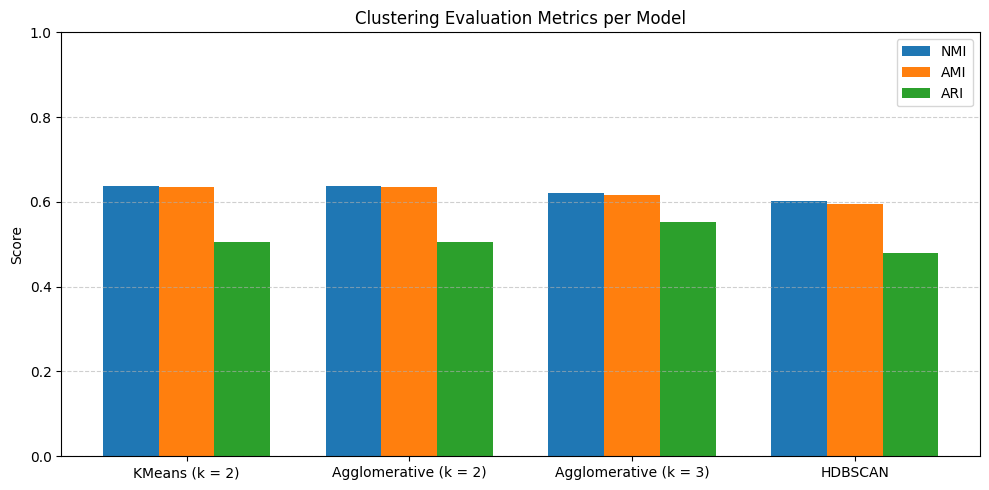

In [43]:
models = [kmeansmodel, agg_model_k2, agg_model_k3, hdbscan_model]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "Agglomerative (k = 3)", "HDBSCAN"]
true_labels_list = [target_cleaned, target_cleaned, target_cleaned, target_cleaned]

evaluate_clustering_models(true_labels_list, models, titles)

### Συμπεράσματα από τις Μετρικές Αξιολόγησης

- Οι αλγόριθμοι **KMeans (k = 2)** και **Agglomerative (k = 2)** εμφάνισαν **ίδιες τιμές** για τις μετρικές **NMI = 0.6379** και **AMI = 0.6350**, κάτι που δείχνει ότι είχαν **εξίσου καλή απόδοση** ως προς την πληροφοριακή συμφωνία με τις πραγματικές ετικέτες (labels).

- Ο **Agglomerative με k = 3** εμφάνισε τη **μεγαλύτερη τιμή ARI = 0.5519**, γεγονός που υποδεικνύει ότι τα δεδομένα κατανεμήθηκαν **με μεγαλύτερη ακρίβεια στα 3 clusters**, αν και η διαφορά δεν είναι ιδιαίτερα μεγάλη σε σχέση με το k = 2.

- Ο αλγόριθμος **HDBSCAN** είχε τις **χαμηλότερες τιμές** σε όλες τις μετρικές (**NMI = 0.6022**, **AMI = 0.5951**, **ARI = 0.4786**), γεγονός που υποδηλώνει ότι ήταν ο **πιο αδύναμος αλγόριθμος** για το συγκεκριμένο dataset, τουλάχιστον ως προς την ομοιότητα με τις πραγματικές κλάσεις.

 Συνολικά, το clustering με **k = 2** δείχνει να αποδίδει καλύτερα και πιο σταθερά στο συγκεκριμένο dataset, ανεξαρτήτως αλγορίθμου.

### Επανάληψη Πειραμάτων με τα Αρχικά Δεδομένα (Με Outliers)

Για λόγους πληρότητας, επανέτρεξα τους αλγορίθμους **KMeans**, **Agglomerative Clustering** και **HDBSCAN** στα **αρχικά δεδομένα που περιλαμβάνουν τους outliers**.

 **Σημείωση:**  
Για λόγους ευκολίας και χρόνου, **παραλείπω στην παρουσίαση** τα ενδιάμεσα βήματα και τις επιμέρους **οπτικοποιήσεις**.  
Για να διατηρήσω τη ροή της εργασίας και την αναγνωσιμότητά της, επιλέγω να παρουσιάσω **μόνο τις τελικές μετρικές αξιολόγησης** των μοντέλων.

 **Παρατήρηση:**  
Οι βέλτιστες τιμές του **k** (π.χ. k = 2 ή k = 3) που προέκυψαν μέσω **Silhouette Score** και **Elbow Method** ήταν **παρόμοιες** με εκείνες του καθαρισμένου dataset.  
Οι **διαφορές στους Silhouette Scores** ήταν **πολύ μικρές**, γεγονός που δείχνει ότι οι **outliers δεν αλλοίωσαν ουσιαστικά τη δομή των clusters** και πιθανόν αντιπροσωπεύουν **ακραίες αλλά έγκυρες παρατηρήσεις**.

In [44]:
kmeansmodel_no_cln = run_kmeans(df_scaled, n_clusters=2)

Inertia:
 222.36170496502302
Silhouette Score: 0.5818


In [45]:
agg_model_k2_no_cln = run_agglomerative_clustering(df_scaled, n_clusters=2)
agg_model_k3_no_cln = run_agglomerative_clustering(df_scaled, n_clusters=3)
agg_model_d10_no_cln = run_agglomerative_clustering(df_scaled, distance_threshold=10, n_clusters=None)


Silhouette Score: 0.5770

Silhouette Score: 0.4467

Silhouette Score: 0.4467


In [46]:
hdbscan_model_no_cln = run_hdbscan_clustering(df_scaled)


Αριθμός clusters: 2
Αριθμός outliers: 2



KMeans (k = 2):
  NMI: 0.7337
  AMI: 0.7316
  ARI: 0.5681

Agglomerative (k = 2):
  NMI: 0.6925
  AMI: 0.6900
  ARI: 0.5438

Agglomerative (k = 3):
  NMI: 0.6755
  AMI: 0.6713
  ARI: 0.6153

HDBSCAN:
  NMI: 0.6778
  AMI: 0.6722
  ARI: 0.5394


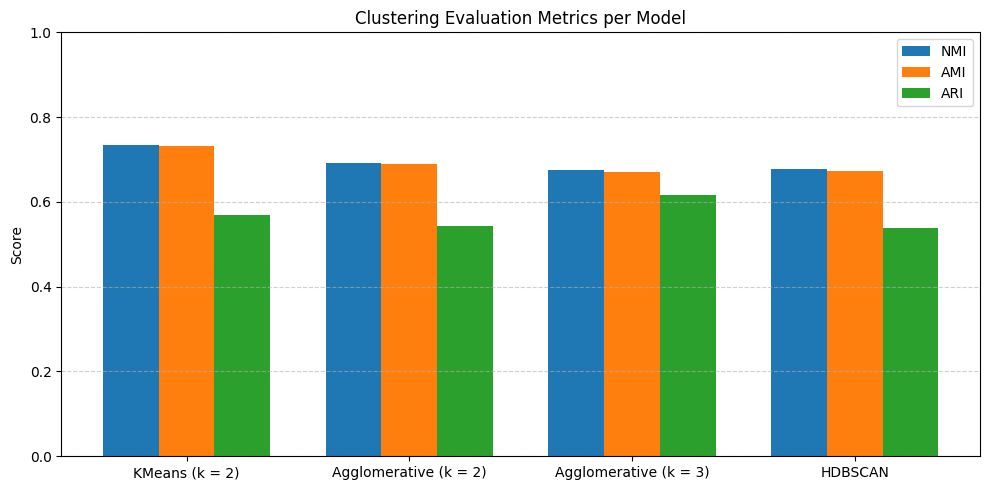

In [47]:
models = [kmeansmodel_no_cln, agg_model_k2_no_cln, agg_model_k3_no_cln, hdbscan_model_no_cln]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "Agglomerative (k = 3)", "HDBSCAN"]
true_labels_list = [target, target, target, target]

evaluate_clustering_models(true_labels_list, models, titles)

### Αξιολόγηση Με Outliers: Καλύτερες Επιδόσεις

Παρατηρούμε ότι η διατήρηση των outliers **οδήγησε σε υψηλότερες τιμές των μετρικών NMI, AMI και ARI** για όλους τους αλγορίθμους. Ιδιαίτερα, ο **KMeans με k = 2** ξεχώρισε με τις υψηλότερες επιδόσεις:

- **NMI = 0.7337**
- **AMI = 0.7316**
- **ARI = 0.5681**

Αυτό υποδεικνύει ότι οι τιμές που θεωρήθηκαν αρχικά ως outliers **πιθανώς δεν ήταν απλός θόρυβος**, αλλά **πραγματικές παρατηρήσεις** που βοήθησαν στη βελτίωση της ομαδοποίησης.

Επιπλέον, βλέπουμε ότι **ο KMeans με k = 2 ξεπέρασε σε απόδοση ακόμα και τον Agglomerative με k = 2**, ενώ στις προηγούμενες δοκιμές με καθαρισμένα δεδομένα είχαν **ταυτόσημες επιδόσεις**. Αυτό δείχνει πως ο KMeans αξιοποίησε καλύτερα την πληροφορία των outliers για να δημιουργήσει πιο διακριτά clusters.

 Επομένως, η χρήση τεχνικών αφαίρεσης outliers απαιτεί **κριτική προσέγγιση** και **επιβεβαίωση μέσω πειραματισμού**, καθώς η αφαίρεσή τους δεν είναι πάντα επωφελής.